# Data Preparation

In [1]:
pip install sktime


Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

from sktime.performance_metrics.forecasting import MeanAbsoluteScaledError

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import numpy as np
import datetime
import requests
import warnings

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings('ignore')

In [4]:
# ARIMA models

belgium_data = pd.read_csv("univariate_df_Belgium.csv")
chile_data = pd.read_csv("univariate_df_Chile.csv")
czechia_data = pd.read_csv("univariate_df_Czechia.csv")
estonia_data = pd.read_csv("univariate_df_Estonia.csv")
france_data = pd.read_csv("univariate_df_France.csv")
ireland_data = pd.read_csv("univariate_df_Ireland.csv")
israel_data = pd.read_csv("univariate_df_Israel.csv")
italy_data = pd.read_csv("univariate_df_Italy.csv")
malaysia_data = pd.read_csv("univariate_df_Malaysia.csv")
usa_data = pd.read_csv("univariate_df_United_States.csv")

In [5]:
#set index to datetime
belgium_data['date'] = pd.to_datetime(belgium_data['date'])
belgium_data.set_index('date', inplace=True)

chile_data['date'] = pd.to_datetime(chile_data['date'])
chile_data.set_index('date', inplace=True)

czechia_data['date'] = pd.to_datetime(czechia_data['date'])
czechia_data.set_index('date', inplace=True)

estonia_data['date'] = pd.to_datetime(estonia_data['date'])
estonia_data.set_index('date', inplace=True)

france_data['date'] = pd.to_datetime(france_data['date'])
france_data.set_index('date', inplace=True)

ireland_data['date'] = pd.to_datetime(ireland_data['date'])
ireland_data.set_index('date', inplace=True)

israel_data['date'] = pd.to_datetime(israel_data['date'])
israel_data.set_index('date', inplace=True)

italy_data['date'] = pd.to_datetime(italy_data['date'])
italy_data.set_index('date', inplace=True)

malaysia_data['date'] = pd.to_datetime(malaysia_data['date'])
malaysia_data.set_index('date', inplace=True)

usa_data['date'] = pd.to_datetime(usa_data['date'])
usa_data.set_index('date', inplace=True)



In [6]:
! pip install pmdarima

# Models

## ARIMA

### Belgium ARIMA

In [11]:
##arima belgium
train_size = int(len(belgium_data) * 0.8)
belgium_train, belgium_test = belgium_data[0:train_size], belgium_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(belgium_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
3,1,4,2238.200299
7,2,4,2239.495220
11,3,4,2240.750981
15,4,4,2242.754329
13,4,2,2248.292003
10,3,3,2248.806847
6,2,3,2250.391333
14,4,3,2252.902045
8,3,1,2256.385498
4,2,1,2257.609463


In [12]:
model=ARIMA(belgium_train['new_deaths'],order=(1,1,4))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(1, 1, 4)   Log Likelihood                -903.745
Date:                Tue, 12 Mar 2024   AIC                           1819.491
Time:                        22:13:08   BIC                           1837.942
Sample:                    03-01-2020   HQIC                          1826.983
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7094      0.043     16.685      0.000       0.626       0.793
ma.L1          0.4066      1.814      0.224      0.823      -3.148       3.961
ma.L2         -0.2815      2.542     -0.111      0.912      -5.263       4.700
ma.L3         -0.6186      2.033     -0.304      0.761      -4.602       3.365
ma.L4         -0.5056      0.915     -0.553      0.581      -2.299       1.288
sigma2      4574.9571   8254.392      0.554      0.579   -1.16e+04    2.08e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              2330.29
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.08   Skew:                             2.82
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='date'>

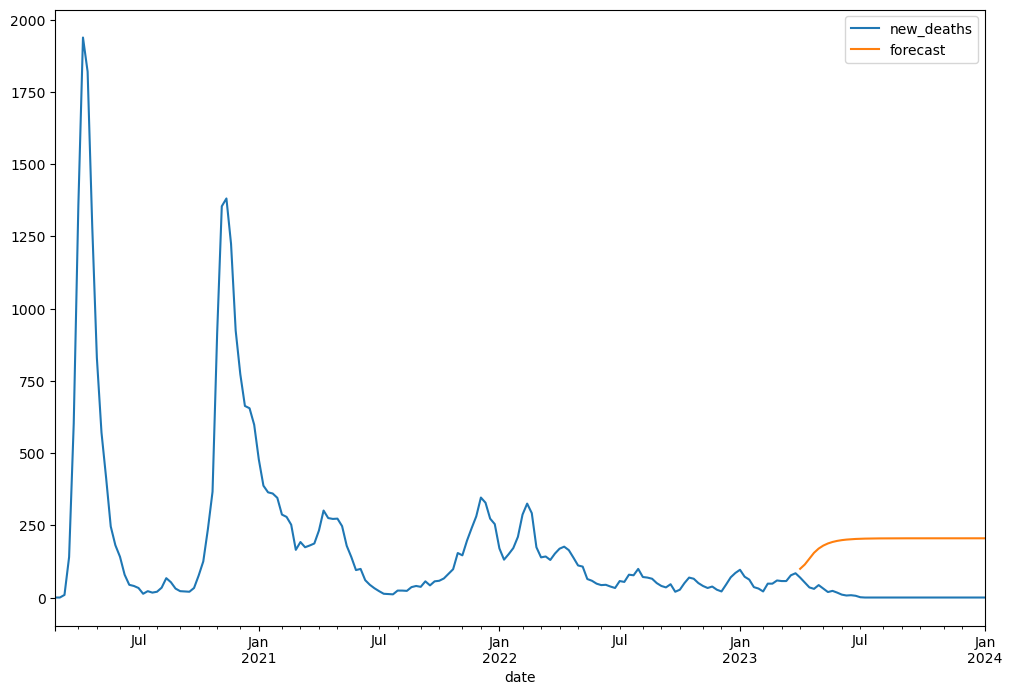

In [13]:
belgium_data['forecast']=model_fit.predict(start = len(belgium_train), end=len(belgium_train)+len(belgium_test)-1, dynamic=True)
belgium_data[['new_deaths','forecast']].plot(figsize=(12,8))

In [14]:
belgium_test['forecast'] = belgium_data['forecast']

In [15]:
mase = MeanAbsoluteScaledError(sp = 12)
mase = mase(belgium_test['new_deaths'], belgium_test['forecast'], y_train = belgium_train['new_deaths'])
metrics_df = pd.DataFrame(columns=['Model', 'MASE'])
metrics_df = metrics_df.append({'Model': 'ARIMA Belgium', 'MASE': mase}, ignore_index=True)

In [16]:
metrics_df

,Model,MASE
0,ARIMA Belgium,0.811078


### Chile ARIMA

In [17]:
##arima chile
train_size = int(len(chile_data) * 0.8)
chile_train, chile_test = chile_data[0:train_size], chile_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(chile_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
1,1,2,3291.576764
0,1,1,3292.814050
4,2,1,3293.148674
2,1,3,3293.241853
5,2,2,3293.511085
8,3,1,3293.917585
3,1,4,3295.026748
12,4,1,3295.228459
9,3,2,3295.428063
7,2,4,3297.222102


In [18]:
model=ARIMA(chile_train['new_deaths'],order=(1,1,2))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1324.605
Date:                Tue, 12 Mar 2024   AIC                           2657.211
Time:                        22:13:14   BIC                           2669.512
Sample:                    03-01-2020   HQIC                          2662.206
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7743      0.345      2.246      0.025       0.099       1.450
ma.L1         -1.6626      0.363     -4.574      0.000      -2.375      -0.950
ma.L2          0.6628      0.365      1.816      0.069      -0.053       1.378
sigma2      8.869e+05   7.94e-07   1.12e+12      0.000    8.87e+05    8.87e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):            109339.15
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):              30.46   Skew:                            10.76
Prob(H) (two-sided):                  0.00   Kurtosis:                       129.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.48e+27. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='date'>

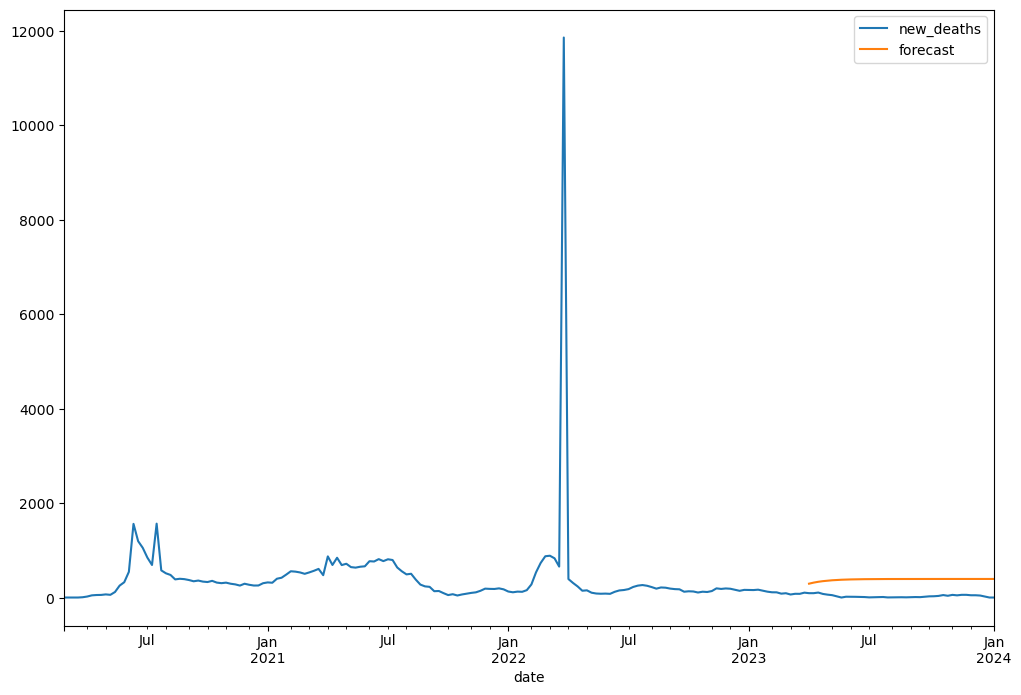

In [19]:
chile_data['forecast']=model_fit.predict(start = len(chile_train), end=len(chile_train)+len(chile_test)-1, dynamic=True)
chile_data[['new_deaths','forecast']].plot(figsize=(12,8))

In [20]:
chile_test['forecast'] = chile_data['forecast']
mase = MeanAbsoluteScaledError(sp = 12)
mase = mase(chile_test['new_deaths'], chile_test['forecast'], y_train = chile_train['new_deaths'])
metrics_df = metrics_df.append({'Model': 'ARIMA Chile', 'MASE': mase}, ignore_index=True)

### Czechia ARIMA

In [21]:
##arima czech
train_size = int(len(czechia_data) * 0.8)
czechia_train, czechia_test = czechia_data[0:train_size], czechia_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(czechia_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
10,3,3,2222.349188
7,2,4,2222.596764
6,2,3,2222.854063
11,3,4,2224.030918
4,2,1,2225.865841
14,4,3,2225.920398
15,4,4,2226.172664
12,4,1,2226.477838
5,2,2,2227.505405
8,3,1,2227.677579


In [22]:
model=ARIMA(chile_train['new_deaths'],order=(3,1,3))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1326.767
Date:                Tue, 12 Mar 2024   AIC                           2667.535
Time:                        22:13:18   BIC                           2689.061
Sample:                    03-01-2020   HQIC                          2676.276
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1913      4.997      0.038      0.969      -9.603       9.985
ar.L2         -1.0057      0.576     -1.747      0.081      -2.134       0.123
ar.L3          0.1047      0.158      0.660      0.509      -0.206       0.415
ma.L1         -1.0777      5.036     -0.214      0.831     -10.947       8.792
ma.L2          1.0851      5.007      0.217      0.828      -8.728      10.898
ma.L3         -0.9909      0.104     -9.496      0.000      -1.195      -0.786
sigma2      1.044e+06   7.42e-06   1.41e+11      0.000    1.04e+06    1.04e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):            108399.45
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):              25.82   Skew:                            10.75
Prob(H) (two-sided):                  0.00   Kurtosis:                       128.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.26e+28. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='date'>

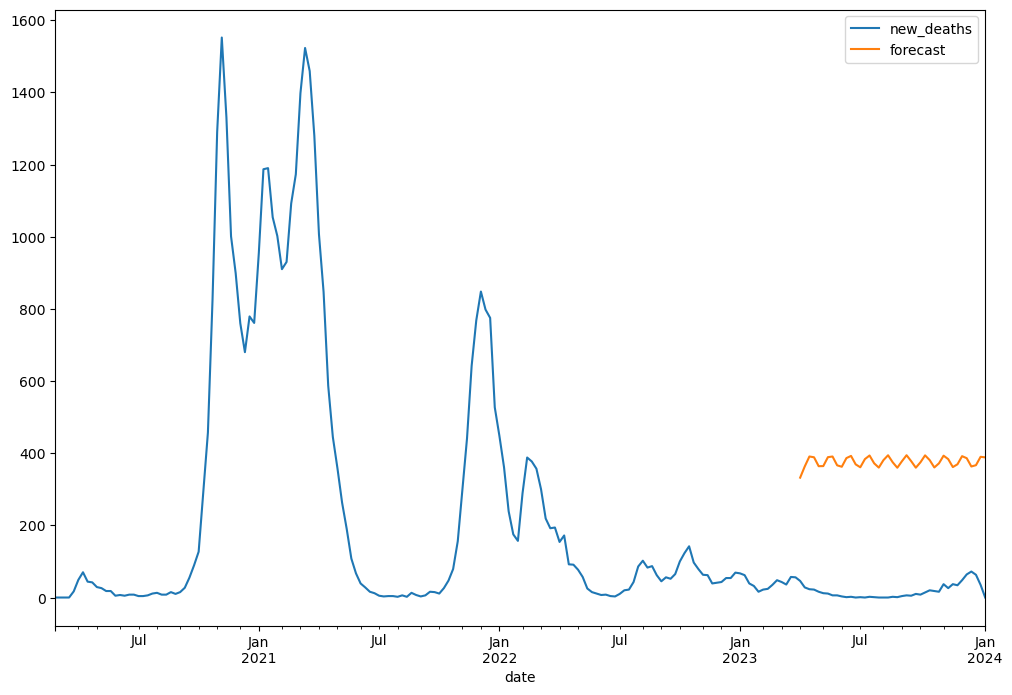

In [23]:
czechia_data['forecast']=model_fit.predict(start = len(czechia_train), end=len(czechia_train)+len(czechia_test)-1, dynamic=True)
czechia_data[['new_deaths','forecast']].plot(figsize=(12,8))

In [24]:
czechia_test['forecast'] = czechia_data['forecast']
mase = MeanAbsoluteScaledError(sp = 12)
mase = mase(czechia_test['new_deaths'], czechia_test['forecast'], y_train = czechia_train['new_deaths'])
metrics_df = metrics_df.append({'Model': 'ARIMA Czechia', 'MASE': mase}, ignore_index=True)

### Estonia ARIMA

In [25]:
##arima estonia
train_size = int(len(estonia_data) * 0.8)
estonia_train, estonia_test = estonia_data[0:train_size], estonia_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(estonia_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
7,2,4,1566.802471
1,1,2,1566.866848
0,1,1,1567.447200
11,3,4,1568.705628
5,2,2,1568.817953
4,2,1,1568.912023
2,1,3,1569.108787
8,3,1,1569.201931
12,4,1,1569.333626
3,1,4,1569.553578


In [26]:
model=ARIMA(estonia_train['new_deaths'],order=(2,1,4))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(2, 1, 4)   Log Likelihood                -634.156
Date:                Tue, 12 Mar 2024   AIC                           1282.313
Time:                        22:13:21   BIC                           1303.839
Sample:                    03-01-2020   HQIC                          1291.054
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5068      0.091    -16.515      0.000      -1.686      -1.328
ar.L2         -0.9080      0.079    -11.554      0.000      -1.062      -0.754
ma.L1          0.8551      0.202      4.229      0.000       0.459       1.251
ma.L2          0.1555      0.124      1.250      0.211      -0.088       0.399
ma.L3         -0.2415      0.140     -1.727      0.084      -0.516       0.033
ma.L4          0.2999      0.084      3.570      0.000       0.135       0.465
sigma2       160.7475     28.682      5.605      0.000     104.532     216.963
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               887.40
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='date'>

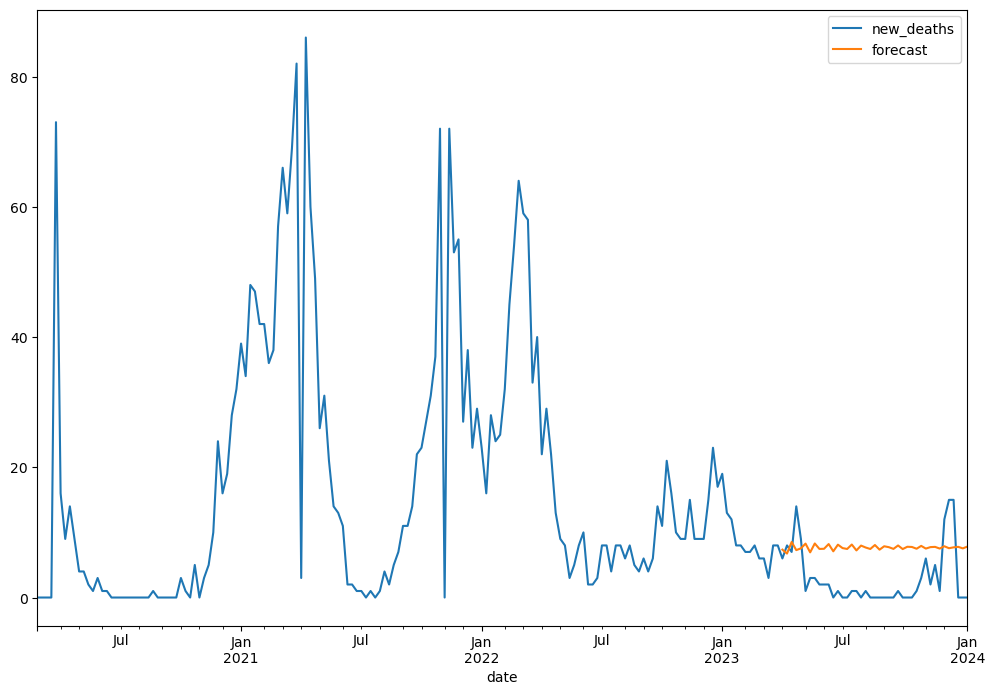

In [27]:
estonia_data['forecast']=model_fit.predict(start = len(estonia_train), end=len(estonia_train)+len(estonia_test)-1, dynamic=True)
estonia_data[['new_deaths','forecast']].plot(figsize=(12,8))

In [28]:
estonia_test['forecast'] = estonia_data['forecast']
mase = MeanAbsoluteScaledError(sp = 12)
mase = mase(estonia_test['new_deaths'], estonia_test['forecast'], y_train = estonia_train['new_deaths'])
metrics_df = metrics_df.append({'Model': 'ARIMA Estonia', 'MASE': mase}, ignore_index=True)

### France ARIMA

In [29]:
##arima france
train_size = int(len(france_data) * 0.8)
france_train, france_test = france_data[0:train_size], france_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(france_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
3,1,4,2662.682447
6,2,3,2663.098499
11,3,4,2663.890489
7,2,4,2664.412819
10,3,3,2664.451603
15,4,4,2665.882423
13,4,2,2666.216507
4,2,1,2666.261996
8,3,1,2666.350545
5,2,2,2667.377973


In [30]:
model=ARIMA(france_train['new_deaths'],order=(1,1,4))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(1, 1, 4)   Log Likelihood               -1072.290
Date:                Tue, 12 Mar 2024   AIC                           2156.581
Time:                        22:13:25   BIC                           2175.032
Sample:                    03-01-2020   HQIC                          2164.073
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8912      0.032     27.624      0.000       0.828       0.954
ma.L1         -0.0080      0.126     -0.063      0.950      -0.255       0.240
ma.L2         -0.2413      0.095     -2.553      0.011      -0.427      -0.056
ma.L3         -0.4883      0.062     -7.889      0.000      -0.610      -0.367
ma.L4         -0.2624      0.060     -4.386      0.000      -0.380      -0.145
sigma2      3.801e+04   5.77e-06   6.59e+09      0.000     3.8e+04     3.8e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               140.47
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                             0.67
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.9e+26. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='date'>

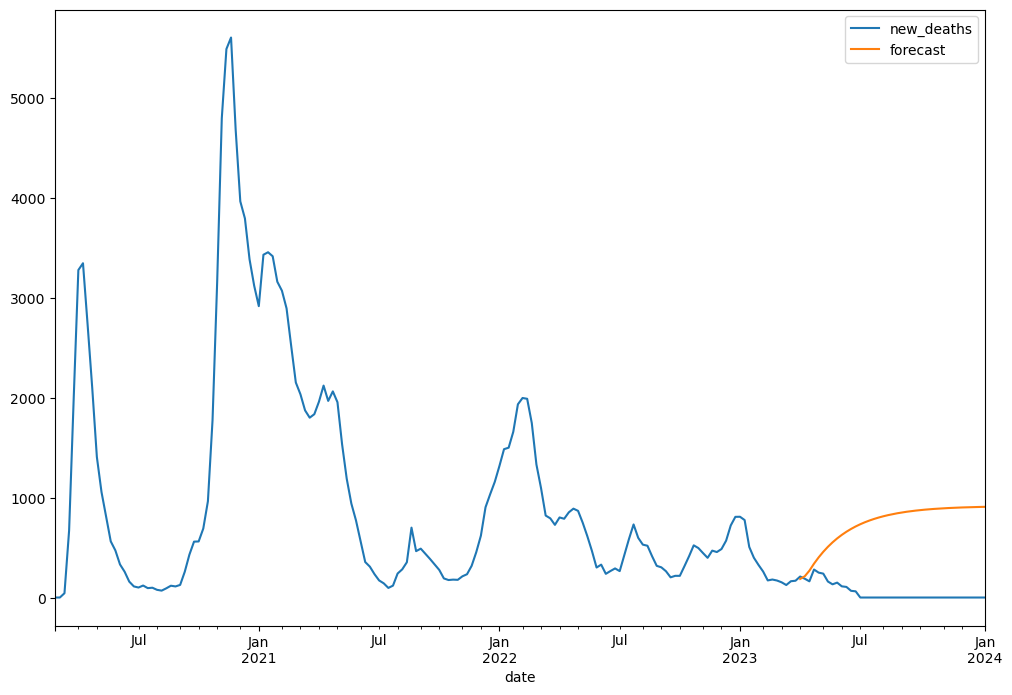

In [31]:
france_data['forecast']=model_fit.predict(start = len(france_train), end=len(france_train)+len(france_test)-1, dynamic=True)
france_data[['new_deaths','forecast']].plot(figsize=(12,8))

In [32]:
france_test['forecast'] = france_data['forecast']
mase = MeanAbsoluteScaledError(sp = 12)
mase = mase(france_test['new_deaths'], france_test['forecast'], y_train = france_train['new_deaths'])
metrics_df = metrics_df.append({'Model': 'ARIMA France', 'MASE': mase}, ignore_index=True)

### Ireland ARIMA

In [33]:
##arima ireland
train_size = int(len(ireland_data) * 0.8)
ireland_train, ireland_test = ireland_data[0:train_size], ireland_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(ireland_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
4,2,1,1804.382133
10,3,3,1805.239002
13,4,2,1805.593407
8,3,1,1805.982273
5,2,2,1806.045870
12,4,1,1807.212943
11,3,4,1807.229193
9,3,2,1807.352124
14,4,3,1807.374752
6,2,3,1807.485978


In [34]:
model=ARIMA(ireland_train['new_deaths'],order=(2,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -730.389
Date:                Tue, 12 Mar 2024   AIC                           1468.778
Time:                        22:13:30   BIC                           1481.078
Sample:                    03-01-2020   HQIC                          1473.773
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5117      0.041     36.900      0.000       1.431       1.592
ar.L2         -0.6500      0.045    -14.504      0.000      -0.738      -0.562
ma.L1         -0.9998      3.603     -0.277      0.781      -8.062       6.062
sigma2       526.7563   1889.580      0.279      0.780   -3176.752    4230.265
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):              2509.59
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                             2.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='date'>

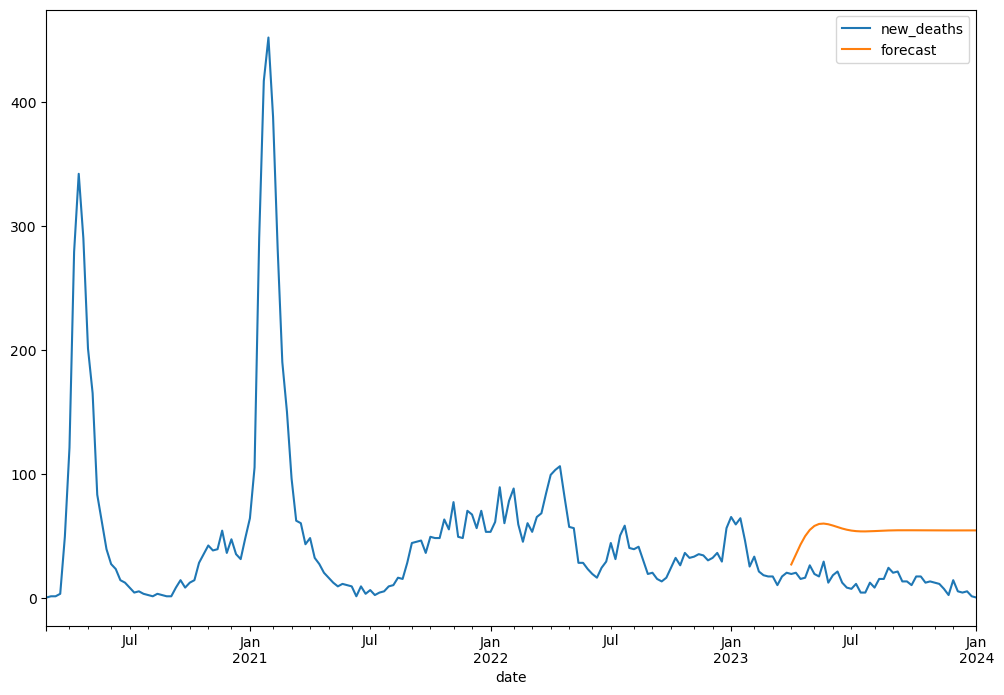

In [35]:
ireland_data['forecast']=model_fit.predict(start = len(ireland_train), end=len(ireland_train)+len(ireland_test)-1, dynamic=True)
ireland_data[['new_deaths','forecast']].plot(figsize=(12,8))

In [36]:
ireland_test['forecast'] = ireland_data['forecast']
mase = MeanAbsoluteScaledError(sp = 12)
mase = mase(ireland_test['new_deaths'], ireland_test['forecast'], y_train = ireland_train['new_deaths'])
metrics_df = metrics_df.append({'Model': 'ARIMA Ireland', 'MASE': mase}, ignore_index=True)

### Italy ARIMA

In [37]:
##arima italy
train_size = int(len(italy_data) * 0.8)
italy_train, italy_test = italy_data[0:train_size], italy_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(italy_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
4,2,1,2789.606572
12,4,1,2790.044468
8,3,1,2790.789203
9,3,2,2791.937487
13,4,2,2792.485134
11,3,4,2793.278883
6,2,3,2793.435895
10,3,3,2796.022607
14,4,3,2796.347027
1,1,2,2798.088099


In [38]:
model=ARIMA(italy_train['new_deaths'],order=(2,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1124.739
Date:                Tue, 12 Mar 2024   AIC                           2257.478
Time:                        22:13:34   BIC                           2269.778
Sample:                    03-01-2020   HQIC                          2262.473
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6152      0.027     60.253      0.000       1.563       1.668
ar.L2         -0.6860      0.022    -31.874      0.000      -0.728      -0.644
ma.L1         -0.9998      2.338     -0.428      0.669      -5.582       3.582
sigma2      7.311e+04    1.7e+05      0.430      0.667    -2.6e+05    4.06e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):               553.13
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                             0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='date'>

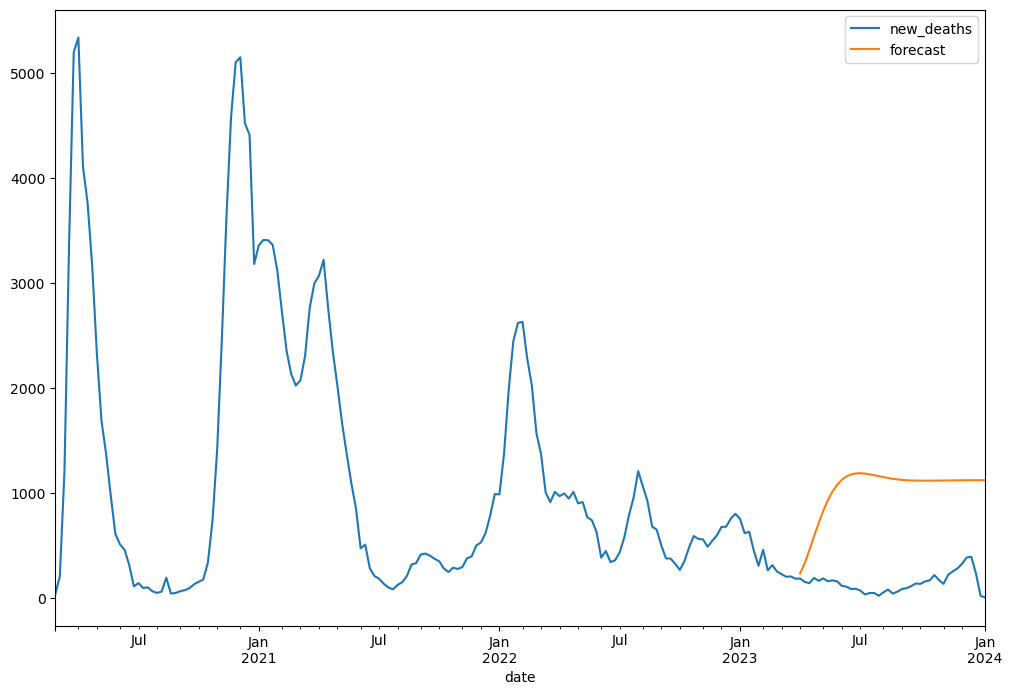

In [39]:
italy_data['forecast']=model_fit.predict(start = len(italy_train), end=len(italy_train)+len(italy_test)-1, dynamic=True)
italy_data[['new_deaths','forecast']].plot(figsize=(12,8))

In [40]:
italy_test['forecast'] = italy_data['forecast']
mase = MeanAbsoluteScaledError(sp = 12)
mase = mase(italy_test['new_deaths'], italy_test['forecast'], y_train = italy_train['new_deaths'])
metrics_df = metrics_df.append({'Model': 'ARIMA Italy', 'MASE': mase}, ignore_index=True)

### Israel ARIMA

In [41]:
##arima israel
train_size = int(len(israel_data) * 0.8)
israel_train, israel_test = israel_data[0:train_size], israel_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(israel_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
7,2,4,1795.079455
3,1,4,1796.312625
4,2,1,1796.317371
14,4,3,1796.401340
11,3,4,1796.490658
15,4,4,1797.410405
6,2,3,1797.650310
10,3,3,1797.796405
8,3,1,1798.284487
5,2,2,1798.292273


In [42]:
model=ARIMA(israel_train['new_deaths'],order=(2,1,4))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(2, 1, 4)   Log Likelihood                -725.362
Date:                Tue, 12 Mar 2024   AIC                           1464.724
Time:                        22:13:38   BIC                           1486.250
Sample:                    03-01-2020   HQIC                          1473.465
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2066      0.241      5.008      0.000       0.734       1.679
ar.L2         -0.3767      0.242     -1.554      0.120      -0.852       0.098
ma.L1         -0.6018      4.997     -0.120      0.904     -10.395       9.191
ma.L2         -0.0316      2.088     -0.015      0.988      -4.124       4.060
ma.L3         -0.1074      1.903     -0.056      0.955      -3.836       3.621
ma.L4         -0.2588      1.359     -0.190      0.849      -2.923       2.406
sigma2       495.3986   2508.821      0.197      0.843   -4421.801    5412.598
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               637.03
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='date'>

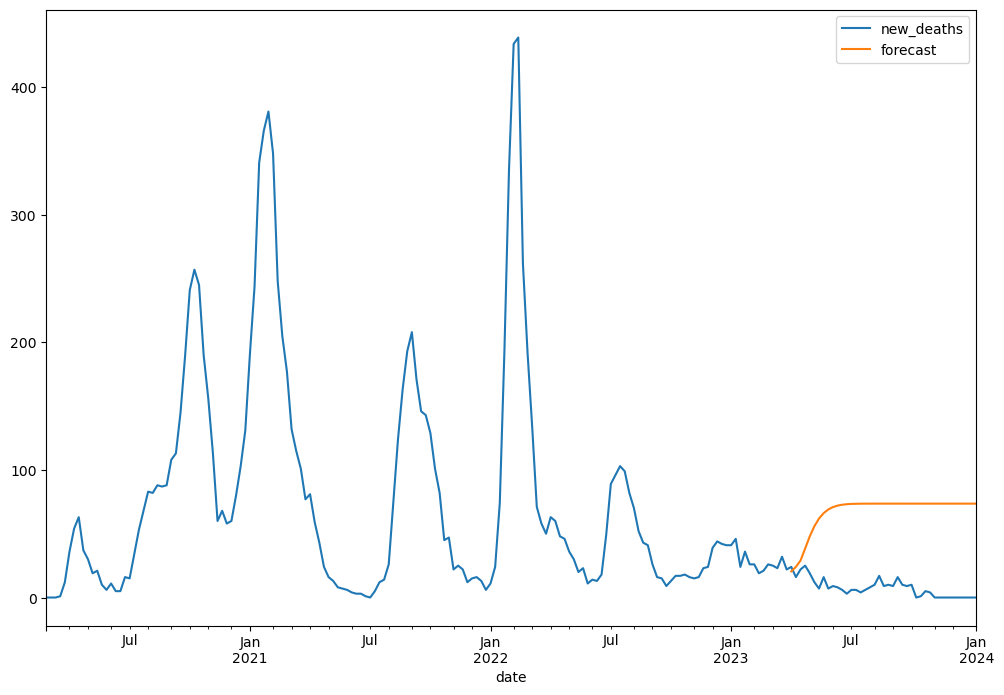

In [43]:
israel_data['forecast']=model_fit.predict(start = len(israel_train), end=len(israel_train)+len(israel_test)-1, dynamic=True)
israel_data[['new_deaths','forecast']].plot(figsize=(12,8))

In [44]:
israel_test['forecast'] = israel_data['forecast']
mase = MeanAbsoluteScaledError(sp = 12)
mase = mase(israel_test['new_deaths'], israel_test['forecast'], y_train = israel_train['new_deaths'])
metrics_df = metrics_df.append({'Model': 'ARIMA Israel', 'MASE': mase}, ignore_index=True)

### Malaysia ARIMA

In [45]:
##arima malaysia
train_size = int(len(malaysia_data) * 0.8)
malaysia_train, malaysia_test = malaysia_data[0:train_size], malaysia_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(malaysia_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
11,3,4,2358.308353
9,3,2,2358.636026
15,4,4,2358.680575
6,2,3,2359.117394
13,4,2,2360.592947
10,3,3,2360.599094
7,2,4,2360.682427
5,2,2,2360.819541
14,4,3,2362.067572
3,1,4,2364.182719


In [46]:
model=ARIMA(israel_train['new_deaths'],order=(3,1,4))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -725.163
Date:                Tue, 12 Mar 2024   AIC                           1466.325
Time:                        22:13:42   BIC                           1490.926
Sample:                    03-01-2020   HQIC                          1476.315
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9871      0.566      1.744      0.081      -0.122       2.097
ar.L2         -0.0197      0.906     -0.022      0.983      -1.795       1.755
ar.L3         -0.1639      0.437     -0.375      0.708      -1.020       0.692
ma.L1         -0.3858      1.690     -0.228      0.819      -3.698       2.926
ma.L2         -0.2461      1.087     -0.226      0.821      -2.376       1.884
ma.L3         -0.0943      0.634     -0.149      0.882      -1.338       1.149
ma.L4         -0.2727      0.485     -0.562      0.574      -1.224       0.679
sigma2       494.1933    772.971      0.639      0.523   -1020.802    2009.188
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               646.03
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='date'>

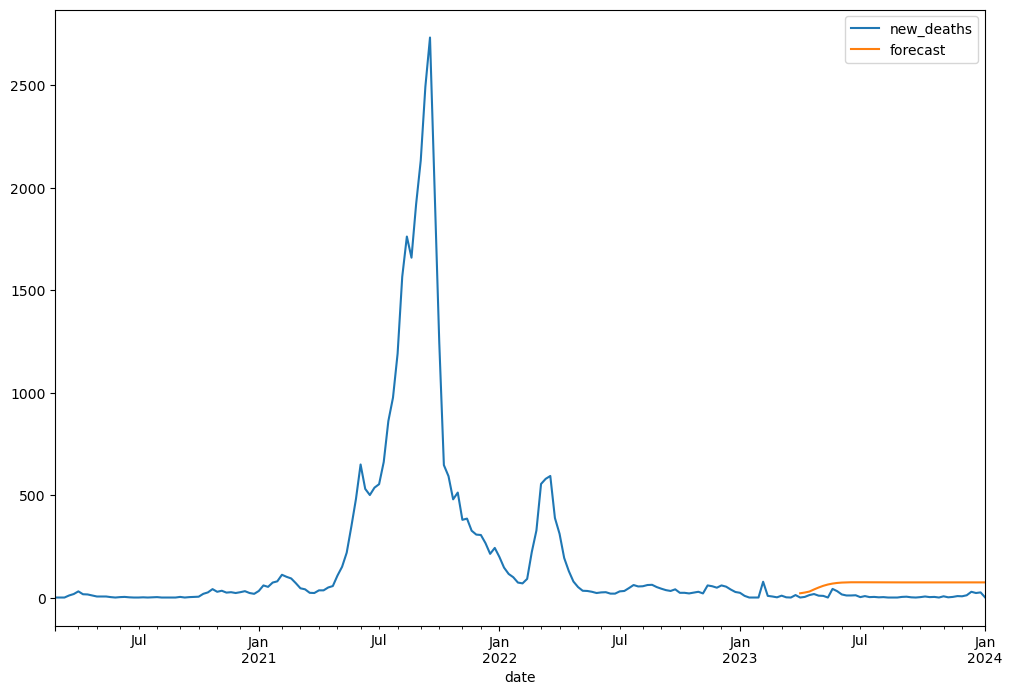

In [47]:
malaysia_data['forecast']=model_fit.predict(start = len(malaysia_train), end=len(malaysia_train)+len(malaysia_test)-1, dynamic=True)
malaysia_data[['new_deaths','forecast']].plot(figsize=(12,8))

In [48]:
malaysia_test['forecast'] = malaysia_data['forecast']
mase = MeanAbsoluteScaledError(sp = 12)
mase = mase(malaysia_test['new_deaths'], malaysia_test['forecast'], y_train = malaysia_train['new_deaths'])
metrics_df = metrics_df.append({'Model': 'ARIMA Malaysia', 'MASE': mase}, ignore_index=True)

### USA ARIMA

In [49]:
##arima us
train_size = int(len(usa_data) * 0.8)
usa_train, usa_test = usa_data[0:train_size], usa_data[train_size:]

##grid search
results=[]
for p in range(1,5):
    for q in range(1,5):
        model=ARIMA(usa_data['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
8,3,1,3423.116149
6,2,3,3423.487158
12,4,1,3423.662124
7,2,4,3425.559635
9,3,2,3427.055647
11,3,4,3427.853197
10,3,3,3429.672760
5,2,2,3430.174429
13,4,2,3431.366169
1,1,2,3431.486887


In [50]:
model=ARIMA(israel_train['new_deaths'],order=(3,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -728.609
Date:                Tue, 12 Mar 2024   AIC                           1467.219
Time:                        22:13:46   BIC                           1482.594
Sample:                    03-01-2020   HQIC                          1473.462
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5884      0.089     17.761      0.000       1.413       1.764
ar.L2         -0.7062      0.160     -4.409      0.000      -1.020      -0.392
ar.L3          0.0094      0.116      0.081      0.936      -0.217       0.236
ma.L1         -0.9807      0.057    -17.131      0.000      -1.093      -0.869
sigma2       520.7843     30.837     16.888      0.000     460.345     581.224
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               801.44
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                            -0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='date'>

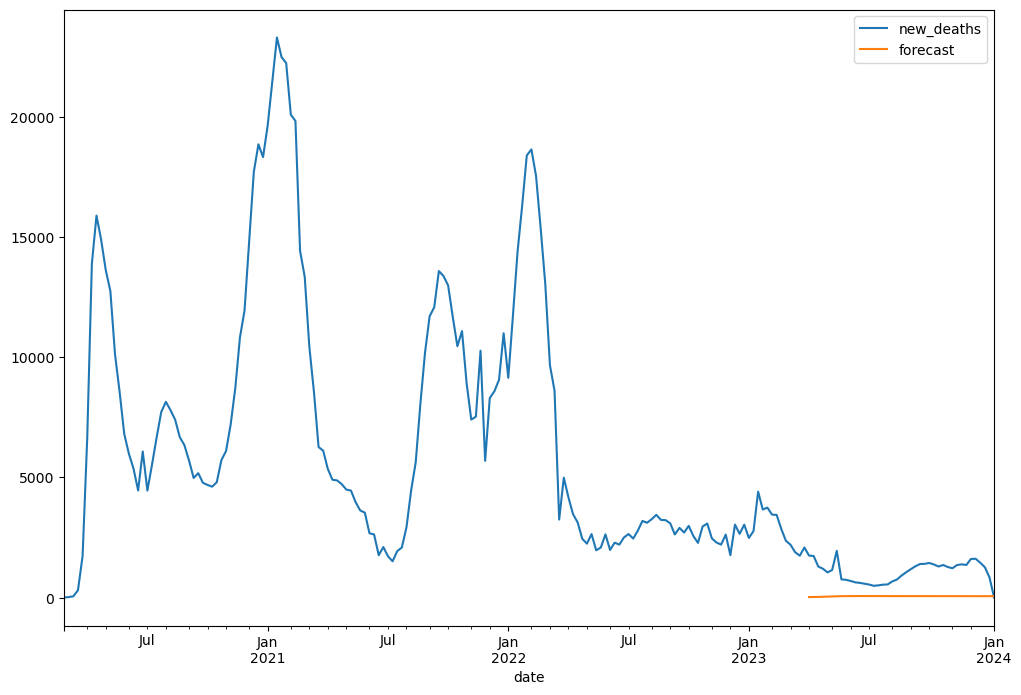

In [51]:
usa_data['forecast']=model_fit.predict(start = len(usa_train), end=len(usa_train)+len(usa_test)-1, dynamic=True)
usa_data[['new_deaths','forecast']].plot(figsize=(12,8))

In [52]:
usa_test['forecast'] = usa_data['forecast']
mase = MeanAbsoluteScaledError(sp = 12)
mase = mase(usa_test['new_deaths'], usa_test['forecast'], y_train = usa_train['new_deaths'])
metrics_df = metrics_df.append({'Model': 'ARIMA USA', 'MASE': mase}, ignore_index=True)

In [53]:
metrics_df

,Model,MASE
0,ARIMA Belgium,0.811078
1,ARIMA Chile,0.819846
2,ARIMA Czechia,1.195245
3,ARIMA Estonia,0.325381
4,ARIMA France,0.692314
5,ARIMA Ireland,0.686831
6,ARIMA Italy,0.796399
7,ARIMA Israel,0.609589
8,ARIMA Malaysia,0.200664
9,ARIMA USA,0.192068


In [54]:
sorted_metrics_df = metrics_df.sort_values(by='MASE', ascending=True)
sorted_metrics_df['MASE'] = sorted_metrics_df['MASE'].astype(float)
sorted_metrics_df['MASE'] = sorted_metrics_df['MASE'].apply(lambda x: '{:.6f}'.format(x))
sorted_metrics_df

,Model,MASE
9,ARIMA USA,0.192068
8,ARIMA Malaysia,0.200664
3,ARIMA Estonia,0.325381
7,ARIMA Israel,0.609589
5,ARIMA Ireland,0.686831
4,ARIMA France,0.692314
6,ARIMA Italy,0.796399
0,ARIMA Belgium,0.811078
1,ARIMA Chile,0.819846
2,ARIMA Czechia,1.195245


## Auto ARIMA

### Belgium AutoARIMA

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  161
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -914.054
Date:                Tue, 12 Mar 2024   AIC                           1834.108
Time:                        22:30:55   BIC                           1843.333
Sample:                    03-01-2020   HQIC                          1837.854
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1084      0.042     26.626      0.000       1.027       1.190
ar.L2         -0.5921      0.040    -14.946      0.000      -0.670      -0.514
sigma2      5315.4848    228.697     23.242      0.0

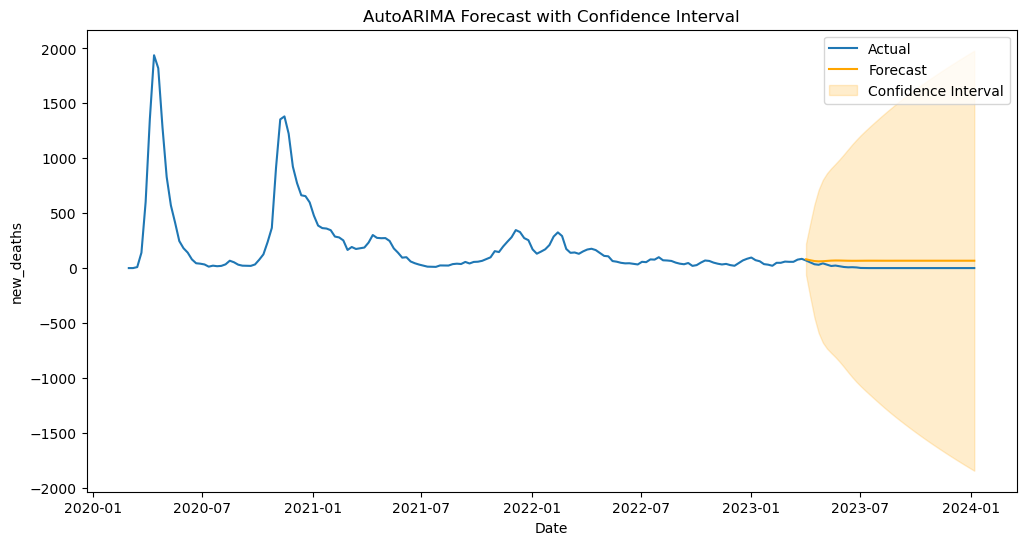

In [111]:
from pmdarima import auto_arima

auto_belgium = auto_arima(belgium_train['new_deaths'], seasonal=True, m=12, suppress_warnings=True, stepwise=True)

print(auto_belgium.summary())

n_periods = len(belgium_test)
forecast, conf_int = auto_belgium.predict(n_periods=n_periods, return_conf_int=True)

forecast_index = belgium_test.index

plt.figure(figsize=(12, 6))
plt.plot(belgium_data.index, belgium_data['new_deaths'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('new_deaths')
plt.legend()
plt.show()


In [112]:
mase = MeanAbsoluteScaledError(sp = 12)
mase = mase(belgium_test['new_deaths'], forecast, y_train = belgium_train['new_deaths'])
metrics_df = metrics_df.append({'Model': 'Auto ARIMA Belgium', 'MASE': mase}, ignore_index=True)
metrics_df_2 = pd.DataFrame(columns=['Model', 'MASE'])
metrics_df_2 = metrics_df_2.append({'Model': 'Auto ARIMA Belgium', 'MASE': mase}, ignore_index=True)


In [113]:
metrics_df_2

,Model,MASE
0,Auto ARIMA Belgium,0.255828


### Chile AutoARIMA

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  161
Model:                        SARIMAX   Log Likelihood               -1332.264
Date:                Tue, 12 Mar 2024   AIC                           2668.527
Time:                        22:32:01   BIC                           2674.690
Sample:                    03-01-2020   HQIC                          2671.030
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    400.5093    256.236      1.563      0.118    -101.703     902.722
sigma2      9.017e+05   4.26e+04     21.183      0.000    8.18e+05    9.85e+05
Ljung-Box (L1) (Q):                   1.68   Jarque-

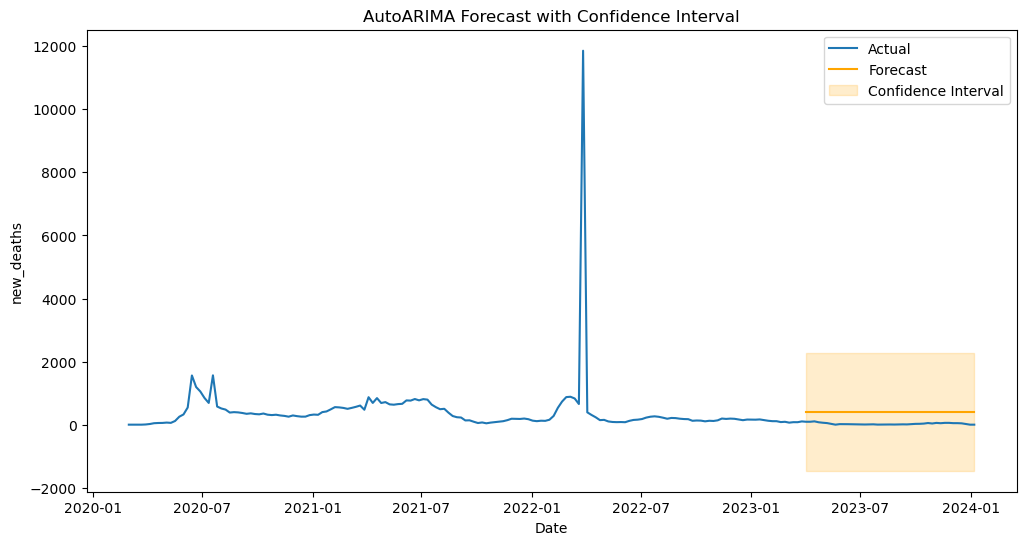

In [114]:
auto_chile = auto_arima(chile_train['new_deaths'], seasonal=True, m=12, suppress_warnings=True, stepwise=True)

print(auto_chile.summary())

n_periods = len(chile_test)
forecast, conf_int = auto_chile.predict(n_periods=n_periods, return_conf_int=True)

forecast_index = chile_test.index

plt.figure(figsize=(12, 6))
plt.plot(chile_data.index, chile_data['new_deaths'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('new_deaths')
plt.legend()
plt.show()

In [115]:
mase = MeanAbsoluteScaledError(sp = 12)
mase = mase(chile_test['new_deaths'], forecast, y_train = chile_train['new_deaths'])
metrics_df = metrics_df.append({'Model': 'Auto ARIMA Chile', 'MASE': mase}, ignore_index=True)
metrics_df_2 = metrics_df_2.append({'Model': 'Auto ARIMA Chile', 'MASE': mase}, ignore_index=True)

### Czechia AutoARIMA

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  161
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -900.684
Date:                Tue, 12 Mar 2024   AIC                           1809.368
Time:                        22:32:06   BIC                           1821.669
Sample:                    03-01-2020   HQIC                          1814.363
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3489      0.092     14.625      0.000       1.168       1.530
ar.L2         -0.5973      0.058    -10.273      0.000      -0.711      -0.483
ma.L1         -0.5726      0.115     -4.969      0.0

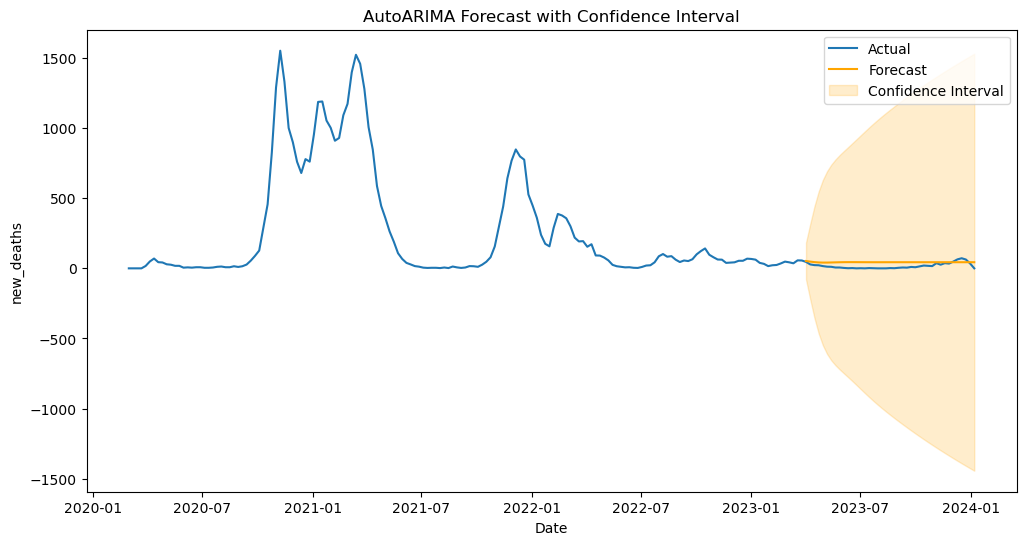

In [116]:
auto_czechia = auto_arima(czechia_train['new_deaths'], seasonal=True, m=12, suppress_warnings=True, stepwise=True)

print(auto_czechia.summary())

n_periods = len(czechia_test)
forecast, conf_int = auto_czechia.predict(n_periods=n_periods, return_conf_int=True)

forecast_index = czechia_test.index

plt.figure(figsize=(12, 6))
plt.plot(czechia_data.index, czechia_data['new_deaths'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('new_deaths')
plt.legend()
plt.show()

In [117]:
mase = MeanAbsoluteScaledError(sp = 12)
mase = mase(czechia_test['new_deaths'], forecast, y_train = czechia_train['new_deaths'])
metrics_df = metrics_df.append({'Model': 'Auto ARIMA Czechia', 'MASE': mase}, ignore_index=True)
metrics_df_2 = metrics_df_2.append({'Model': 'Auto ARIMA Czechia', 'MASE': mase}, ignore_index=True)

### Estonia AutoARIMA

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  161
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -636.094
Date:                Tue, 12 Mar 2024   AIC                           1284.188
Time:                        22:32:09   BIC                           1302.676
Sample:                    03-01-2020   HQIC                          1291.695
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1028      1.229      0.897      0.370      -1.306       3.512
ar.L1          1.4995      0.200      7.492      0.000       1.107       1.892
ar.L2         -0.5681      0.188     -3.028      0.0

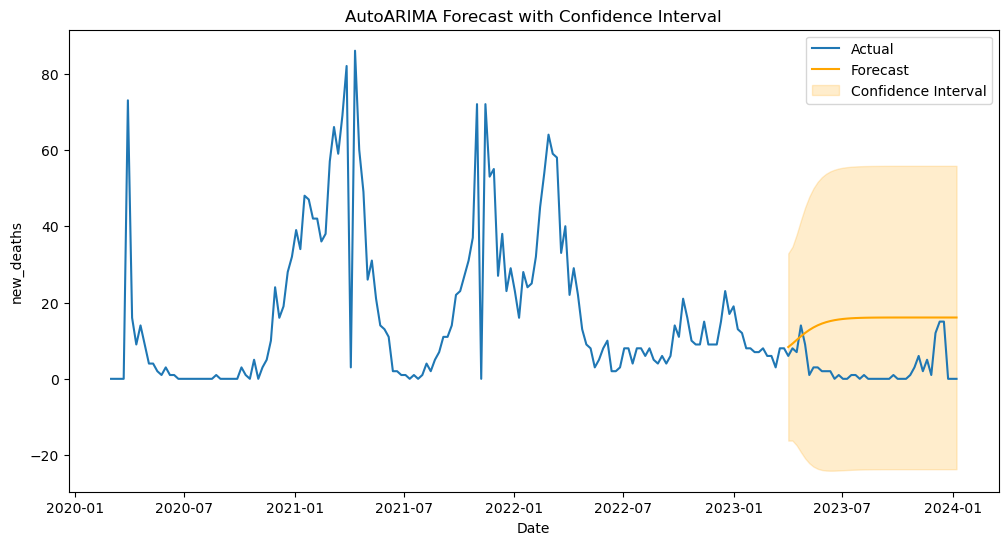

In [118]:
auto_estonia = auto_arima(estonia_train['new_deaths'], seasonal=True, m=12, suppress_warnings=True, stepwise=True)

print(auto_estonia.summary())

n_periods = len(estonia_test)
forecast, conf_int = auto_estonia.predict(n_periods=n_periods, return_conf_int=True)

forecast_index = estonia_test.index

plt.figure(figsize=(12, 6))
plt.plot(estonia_data.index, estonia_data['new_deaths'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('new_deaths')
plt.legend()
plt.show()

In [119]:
mase = MeanAbsoluteScaledError(sp = 12)
mase = mase(estonia_test['new_deaths'], forecast, y_train = estonia_train['new_deaths'])
metrics_df = metrics_df.append({'Model': 'Auto ARIMA Estonia', 'MASE': mase}, ignore_index=True)
metrics_df_2 = metrics_df_2.append({'Model': 'Auto ARIMA Estonia', 'MASE': mase}, ignore_index=True)

### France AutoARIMA

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  161
Model:               SARIMAX(3, 1, 0)   Log Likelihood               -1075.032
Date:                Tue, 12 Mar 2024   AIC                           2158.064
Time:                        22:32:13   BIC                           2170.364
Sample:                    03-01-2020   HQIC                          2163.059
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9061      0.048     19.064      0.000       0.813       0.999
ar.L2         -0.2033      0.077     -2.657      0.008      -0.353      -0.053
ar.L3         -0.1775      0.052     -3.445      0.0

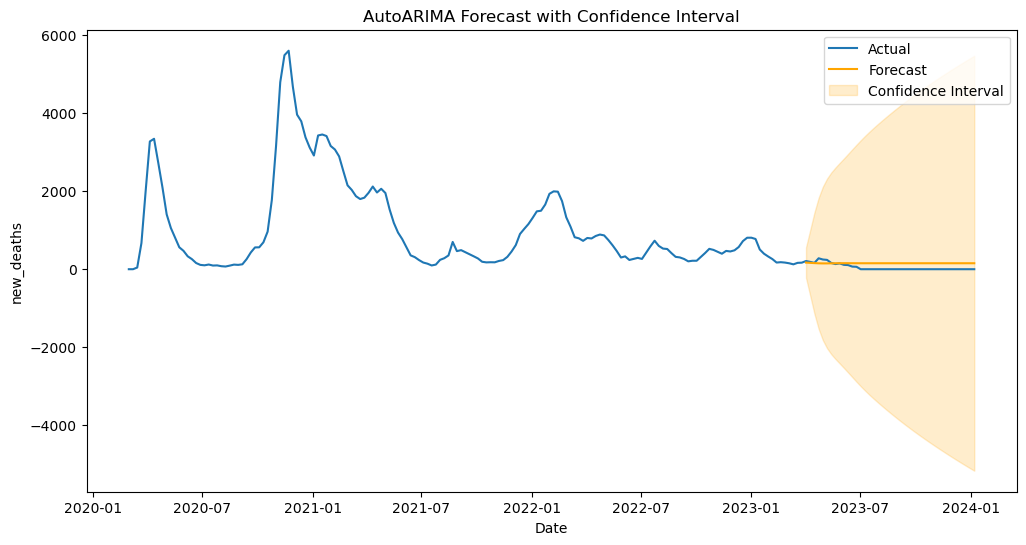

In [120]:
auto_france = auto_arima(france_train['new_deaths'], seasonal=True, m=12, suppress_warnings=True, stepwise=True)

print(auto_france.summary())

n_periods = len(france_test)
forecast, conf_int = auto_france.predict(n_periods=n_periods, return_conf_int=True)

forecast_index = france_test.index

plt.figure(figsize=(12, 6))
plt.plot(france_data.index, france_data['new_deaths'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('new_deaths')
plt.legend()
plt.show()

In [121]:
mase = MeanAbsoluteScaledError(sp = 12)
mase = mase(france_test['new_deaths'], forecast, y_train = france_train['new_deaths'])
metrics_df = metrics_df.append({'Model': 'Auto ARIMA France', 'MASE': mase}, ignore_index=True)
metrics_df_2 = metrics_df_2.append({'Model': 'Auto ARIMA France', 'MASE': mase}, ignore_index=True)

### Ireland AutoARIMA

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  161
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -733.853
Date:                Tue, 12 Mar 2024   AIC                           1475.706
Time:                        22:32:16   BIC                           1488.032
Sample:                    03-01-2020   HQIC                          1480.711
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.7278      3.709      2.083      0.037       0.457      14.998
ar.L1          1.5095      0.044     33.944      0.000       1.422       1.597
ar.L2         -0.6520      0.045    -14.545      0.0

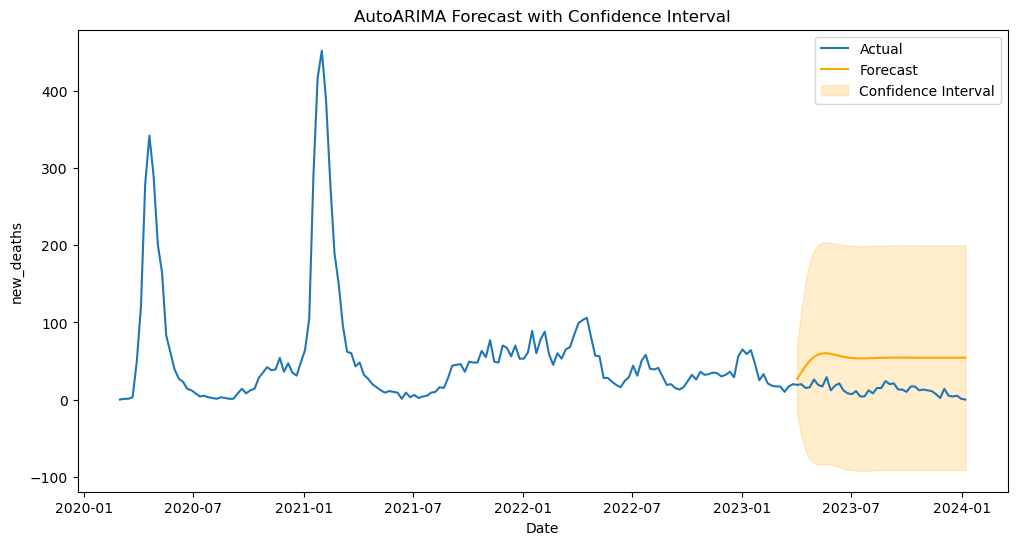

In [122]:
auto_ireland = auto_arima(ireland_train['new_deaths'], seasonal=True, m=12, suppress_warnings=True, stepwise=True)

print(auto_ireland.summary())

n_periods = len(ireland_test)
forecast, conf_int = auto_ireland.predict(n_periods=n_periods, return_conf_int=True)

forecast_index = ireland_test.index

plt.figure(figsize=(12, 6))
plt.plot(ireland_data.index, ireland_data['new_deaths'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('new_deaths')
plt.legend()
plt.show()

In [123]:
mase = MeanAbsoluteScaledError(sp = 12)
mase = mase(ireland_test['new_deaths'], forecast, y_train = ireland_train['new_deaths'])
metrics_df = metrics_df.append({'Model': 'Auto ARIMA Ireland', 'MASE': mase}, ignore_index=True)
metrics_df_2 = metrics_df_2.append({'Model': 'Auto ARIMA Ireland', 'MASE': mase}, ignore_index=True)

### Israel AutoARIMA

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  161
Model:               SARIMAX(2, 0, 3)   Log Likelihood                -729.270
Date:                Tue, 12 Mar 2024   AIC                           1472.539
Time:                        22:32:21   BIC                           1494.109
Sample:                    03-01-2020   HQIC                          1481.297
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0157      7.414      1.756      0.079      -1.516      27.547
ar.L1          1.2188      0.220      5.540      0.000       0.788       1.650
ar.L2         -0.3952      0.209     -1.891      0.0

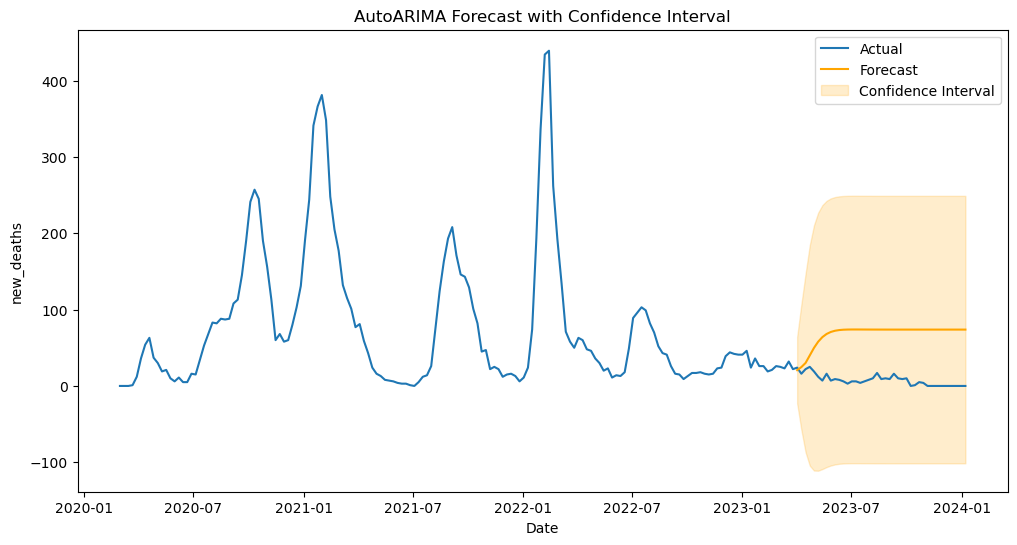

In [124]:
auto_israel = auto_arima(israel_train['new_deaths'], seasonal=True, m=12, suppress_warnings=True, stepwise=True)

print(auto_israel.summary())

n_periods = len(israel_test)
forecast, conf_int = auto_israel.predict(n_periods=n_periods, return_conf_int=True)

forecast_index = israel_test.index

plt.figure(figsize=(12, 6))
plt.plot(israel_data.index, israel_data['new_deaths'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('new_deaths')
plt.legend()
plt.show()

In [125]:
mase = MeanAbsoluteScaledError(sp = 12)
mase = mase(israel_test['new_deaths'], forecast, y_train = israel_train['new_deaths'])
metrics_df = metrics_df.append({'Model': 'Auto ARIMA Israel', 'MASE': mase}, ignore_index=True)
metrics_df_2 = metrics_df_2.append({'Model': 'Auto ARIMA Israel', 'MASE': mase}, ignore_index=True)

### Italy AutoARIMA

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  161
Model:             SARIMAX(2, 1, 0)x(2, 0, [1, 2], 12)   Log Likelihood               -1124.445
Date:                                 Tue, 12 Mar 2024   AIC                           2264.890
Time:                                         22:32:32   BIC                           2289.492
Sample:                                     03-01-2020   HQIC                          2274.880
                                          - 03-26-2023                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.6056      6.947     -0.087      0.931     -14.222      13

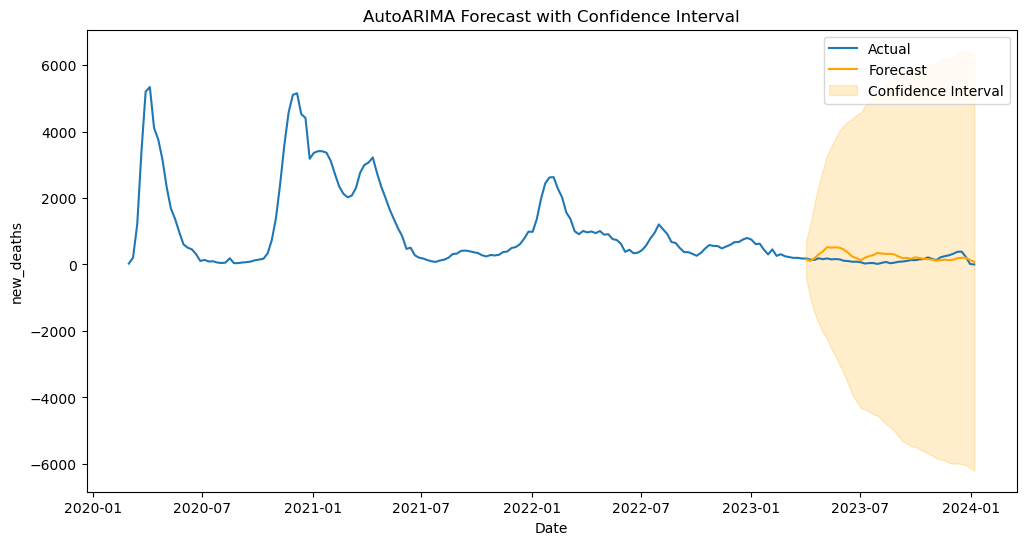

In [126]:
auto_italy = auto_arima(italy_train['new_deaths'], seasonal=True, m=12, suppress_warnings=True, stepwise=True)

print(auto_italy.summary())

n_periods = len(italy_test)
forecast, conf_int = auto_italy.predict(n_periods=n_periods, return_conf_int=True)

forecast_index = italy_test.index

plt.figure(figsize=(12, 6))
plt.plot(italy_data.index, italy_data['new_deaths'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('new_deaths')
plt.legend()
plt.show()

In [127]:
mase = MeanAbsoluteScaledError(sp = 12)
mase = mase(italy_test['new_deaths'], forecast, y_train = italy_train['new_deaths'])
metrics_df = metrics_df.append({'Model': 'Auto ARIMA Italy', 'MASE': mase}, ignore_index=True)
metrics_df_2 = metrics_df_2.append({'Model': 'Auto ARIMA Italy', 'MASE': mase}, ignore_index=True)

### Malaysia AutoARIMA

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  161
Model:               SARIMAX(4, 0, 2)   Log Likelihood                -956.273
Date:                Tue, 12 Mar 2024   AIC                           1926.547
Time:                        22:32:43   BIC                           1948.117
Sample:                    03-01-2020   HQIC                          1935.305
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6444      0.113     14.592      0.000       1.424       1.865
ar.L2         -1.4229      0.228     -6.228      0.000      -1.871      -0.975
ar.L3          0.9512      0.208      4.577      0.0

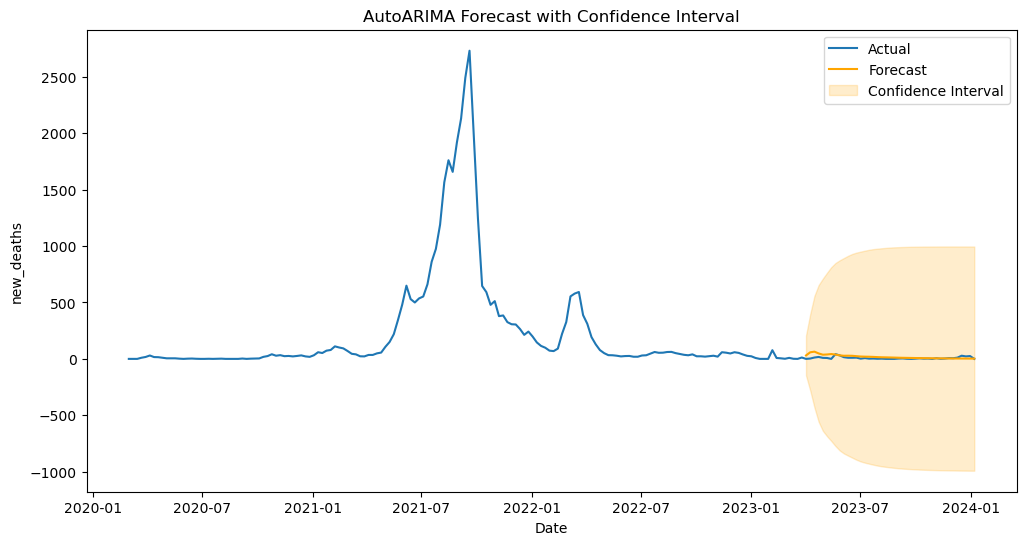

In [128]:
auto_malaysia = auto_arima(malaysia_train['new_deaths'], seasonal=True, m=12, suppress_warnings=True, stepwise=True)

print(auto_malaysia.summary())

n_periods = len(malaysia_test)
forecast, conf_int = auto_malaysia.predict(n_periods=n_periods, return_conf_int=True)

forecast_index = malaysia_test.index

plt.figure(figsize=(12, 6))
plt.plot(malaysia_data.index, malaysia_data['new_deaths'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('new_deaths')
plt.legend()
plt.show()

In [129]:
mase = MeanAbsoluteScaledError(sp = 12)
mase = mase(malaysia_test['new_deaths'], forecast, y_train = malaysia_train['new_deaths'])
metrics_df = metrics_df.append({'Model': 'Auto ARIMA Malaysia', 'MASE': mase}, ignore_index=True)
metrics_df_2 = metrics_df_2.append({'Model': 'Auto ARIMA Malaysia', 'MASE': mase}, ignore_index=True)

### USA AutoARIMA

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  161
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -1375.347
Date:                Tue, 12 Mar 2024   AIC                           2760.694
Time:                        22:32:58   BIC                           2776.070
Sample:                    03-01-2020   HQIC                          2766.938
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1882      0.051     23.410      0.000       1.089       1.288
ar.L2          0.1126      0.075      1.496      0.135      -0.035       0.260
ar.L3         -0.3708      0.050     -7.370      0.0

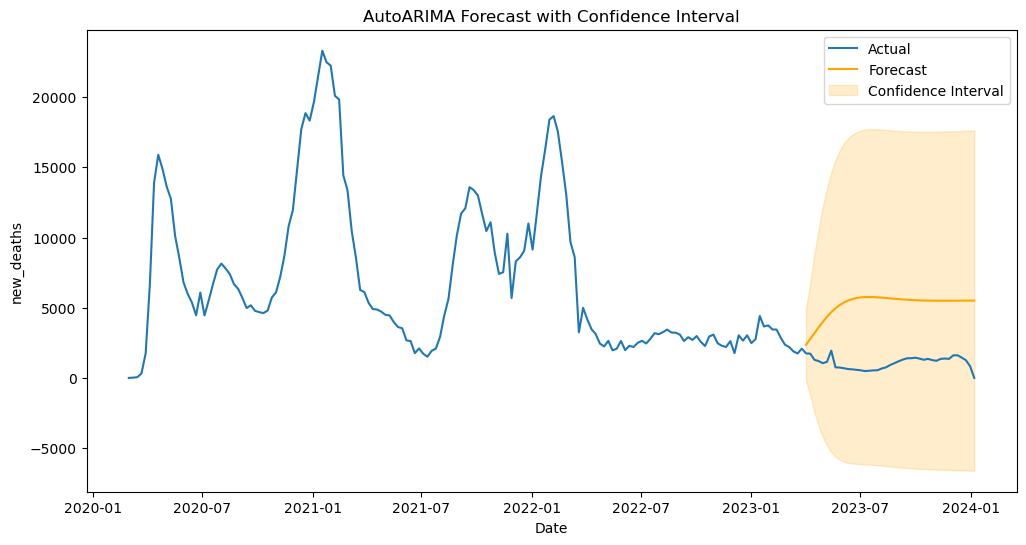

In [130]:
auto_usa = auto_arima(usa_train['new_deaths'], seasonal=True, m=12, suppress_warnings=True, stepwise=True)

print(auto_usa.summary())

n_periods = len(usa_test)
forecast, conf_int = auto_usa.predict(n_periods=n_periods, return_conf_int=True)

forecast_index = usa_test.index

plt.figure(figsize=(12, 6))
plt.plot(usa_data.index, usa_data['new_deaths'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

plt.title('AutoARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('new_deaths')
plt.legend()
plt.show()

In [131]:
mase = MeanAbsoluteScaledError(sp = 12)
mase = mase(usa_test['new_deaths'], forecast, y_train = usa_train['new_deaths'])
metrics_df = metrics_df.append({'Model': 'Auto ARIMA USA', 'MASE': mase}, ignore_index=True)
metrics_df_2 = metrics_df_2.append({'Model': 'Auto ARIMA USA', 'MASE': mase}, ignore_index=True)

In [132]:
metrics_df

,Model,MASE
0,ARIMA Belgium,0.811078
1,ARIMA Chile,0.819846
2,ARIMA Czechia,1.195245
3,ARIMA Estonia,0.325381
4,ARIMA France,0.692314
5,ARIMA Ireland,0.686831
6,ARIMA Italy,0.796399
7,ARIMA Israel,0.609589
8,ARIMA Malaysia,0.200664
9,ARIMA USA,0.192068


In [133]:
metrics_df_2

,Model,MASE
0,Auto ARIMA Belgium,0.255828
1,Auto ARIMA Chile,0.862232
2,Auto ARIMA Czechia,0.100879
3,Auto ARIMA Estonia,0.651724
4,Auto ARIMA France,0.122468
5,Auto ARIMA Ireland,0.688706
6,Auto ARIMA Israel,0.615392
7,Auto ARIMA Italy,0.141391
8,Auto ARIMA Malaysia,0.048648
9,Auto ARIMA USA,0.772907


In [134]:
sorted_metrics_df = metrics_df_2.sort_values(by='MASE', ascending=True)
sorted_metrics_df['MASE'] = sorted_metrics_df['MASE'].astype(float)
sorted_metrics_df['MASE'] = sorted_metrics_df['MASE'].apply(lambda x: '{:.6f}'.format(x))
sorted_metrics_df

,Model,MASE
8,Auto ARIMA Malaysia,0.048648
2,Auto ARIMA Czechia,0.100879
4,Auto ARIMA France,0.122468
7,Auto ARIMA Italy,0.141391
0,Auto ARIMA Belgium,0.255828
6,Auto ARIMA Israel,0.615392
3,Auto ARIMA Estonia,0.651724
5,Auto ARIMA Ireland,0.688706
9,Auto ARIMA USA,0.772907
1,Auto ARIMA Chile,0.862232


## Prophet Univariate

In [71]:
! pip install prophet

In [6]:
from prophet import Prophet

### Belgium Prophet

22:49:19 - cmdstanpy - INFO - Chain [1] start processing
22:49:19 - cmdstanpy - INFO - Chain [1] done processing


The MASE for the baseline model is 1.1880307496304428


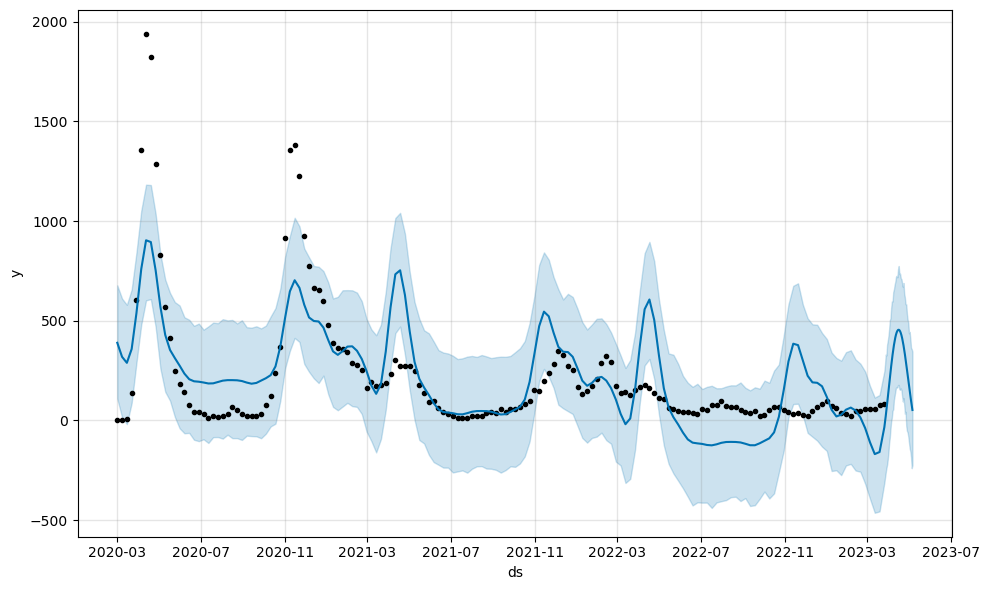

In [142]:
model_baseline = Prophet().fit(belgium_train.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}))
future_baseline = model_baseline.make_future_dataframe(periods=41)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 

performance_baseline = pd.merge(belgium_test.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}), forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-41:], on='ds')

mase_calculator = MeanAbsoluteScaledError(sp=12)
y_true = performance_baseline['y'].values
y_pred = performance_baseline['yhat'].values

mase_score = mase_calculator(y_true=y_true, y_pred=y_pred, y_train = belgium_train['new_deaths'])

print(f'The MASE for the baseline model is {mase_score}')
metrics_df_3 = pd.DataFrame(columns=['Model', 'MASE'])
metrics_df = metrics_df.append({'Model': 'Prophet Belgium', 'MASE': mase_score}, ignore_index=True)
metrics_df_3 = metrics_df_3.append({'Model': 'Prophet Belgium', 'MASE': mase_score}, ignore_index=True)

In [143]:
metrics_df

,Model,MASE
0,ARIMA Belgium,0.811078
1,ARIMA Chile,0.819846
2,ARIMA Czechia,1.195245
3,ARIMA Estonia,0.325381
4,ARIMA France,0.692314
5,ARIMA Ireland,0.686831
6,ARIMA Italy,0.796399
7,ARIMA Israel,0.609589
8,ARIMA Malaysia,0.200664
9,ARIMA USA,0.192068


### Chile Prophet

22:49:22 - cmdstanpy - INFO - Chain [1] start processing


22:49:23 - cmdstanpy - INFO - Chain [1] done processing


The MASE for the baseline model is 0.9988382160355247


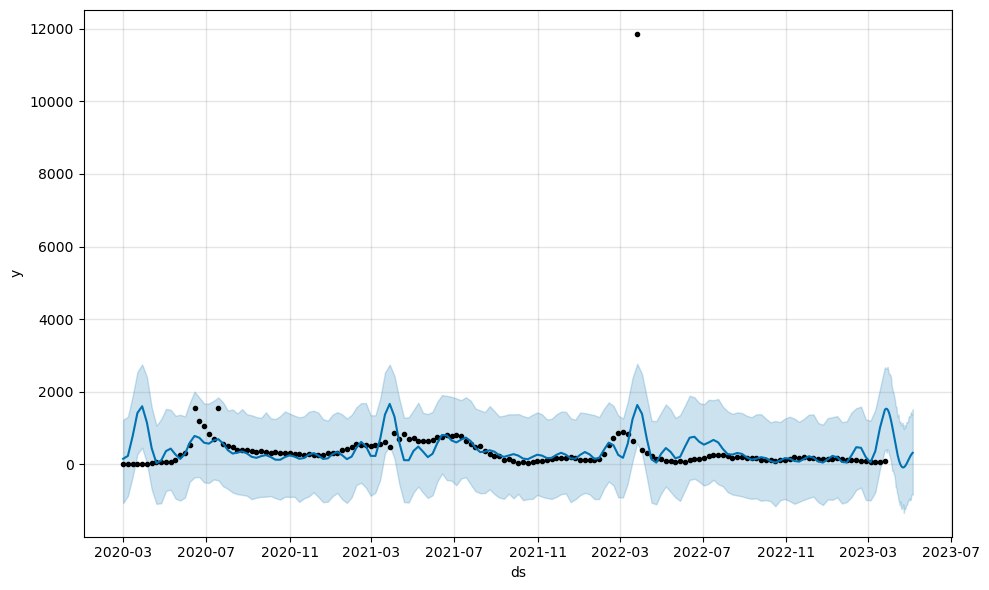

In [144]:
model_baseline = Prophet().fit(chile_train.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}))
future_baseline = model_baseline.make_future_dataframe(periods=41)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 

performance_baseline = pd.merge(chile_test.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}) , forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-41:], on='ds')
mase_calculator = MeanAbsoluteScaledError(sp=12)
y_true = performance_baseline['y'].values
y_pred = performance_baseline['yhat'].values

mase_score = mase_calculator(y_true=y_true, y_pred=y_pred, y_train = chile_train['new_deaths'])

print(f'The MASE for the baseline model is {mase_score}')
metrics_df_3 = metrics_df_3.append({'Model': 'Prophet Chile', 'MASE': mase_score}, ignore_index=True)
metrics_df = metrics_df.append({'Model': 'Prophet Chile', 'MASE': mase_score}, ignore_index=True)

### Czechia Prophet

22:49:38 - cmdstanpy - INFO - Chain [1] start processing


22:49:38 - cmdstanpy - INFO - Chain [1] done processing


The MASE for the baseline model is 0.6686405675571133


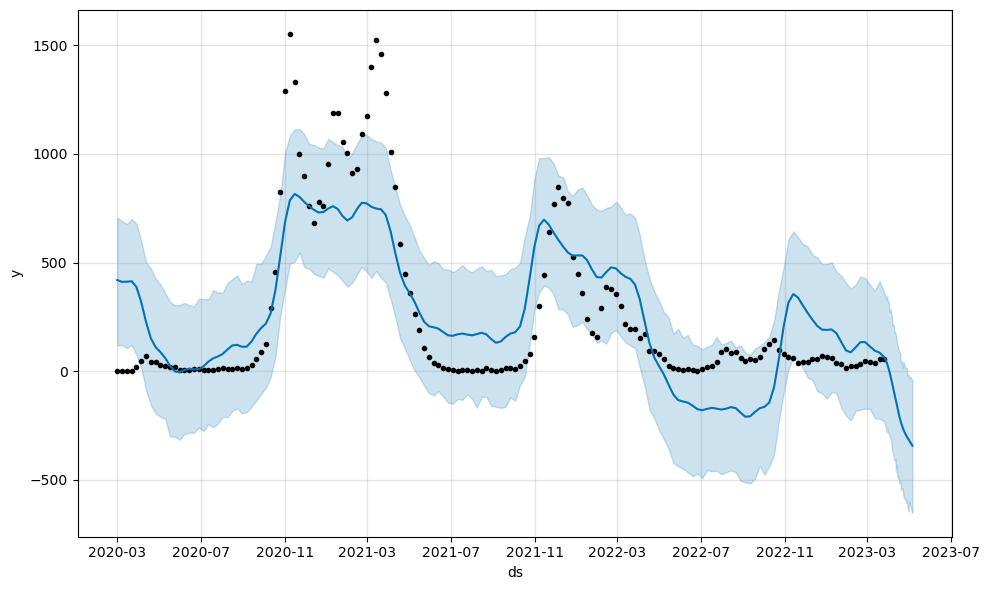

In [146]:
model_baseline = Prophet().fit(czechia_train.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}))
future_baseline = model_baseline.make_future_dataframe(periods=41)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 

performance_baseline = pd.merge(czechia_test.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}) , forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-41:], on='ds')
mase_calculator = MeanAbsoluteScaledError(sp=12)
y_true = performance_baseline['y'].values
y_pred = performance_baseline['yhat'].values

mase_score = mase_calculator(y_true=y_true, y_pred=y_pred, y_train = czechia_train['new_deaths'])

print(f'The MASE for the baseline model is {mase_score}')
metrics_df_3 = metrics_df_3.append({'Model': 'Prophet Czechia', 'MASE': mase_score}, ignore_index=True)
metrics_df = metrics_df.append({'Model': 'Prophet Czechia', 'MASE': mase_score}, ignore_index=True)

### Estonia Prophet

22:49:43 - cmdstanpy - INFO - Chain [1] start processing


22:49:43 - cmdstanpy - INFO - Chain [1] done processing


The MASE for the baseline model is 0.546806697141547


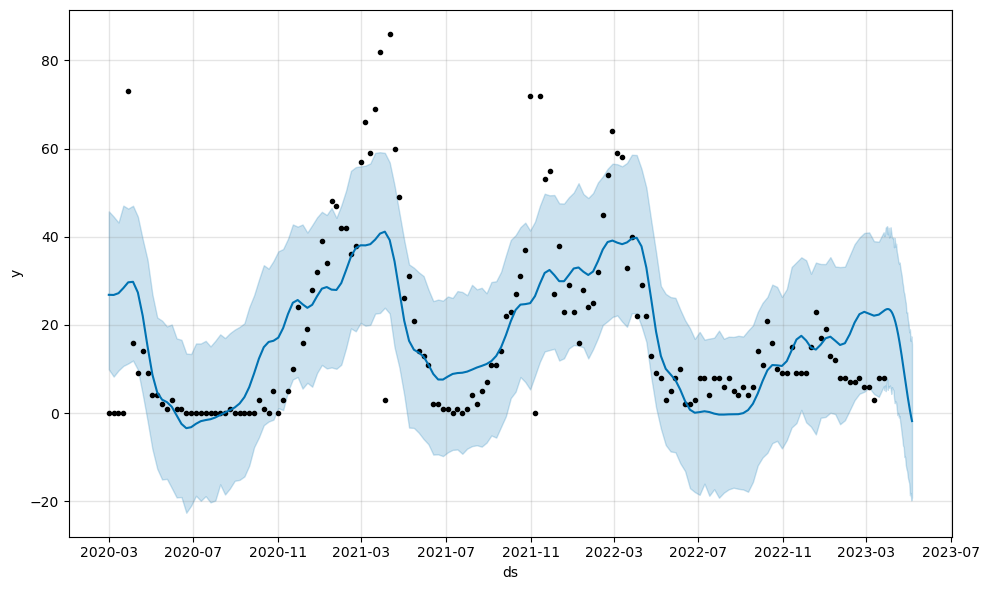

In [147]:
model_baseline = Prophet().fit(estonia_train.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}))
future_baseline = model_baseline.make_future_dataframe(periods=41)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 

performance_baseline = pd.merge(estonia_test.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}) , forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-41:], on='ds')
mase_calculator = MeanAbsoluteScaledError(sp=12)
y_true = performance_baseline['y'].values
y_pred = performance_baseline['yhat'].values

mase_score = mase_calculator(y_true=y_true, y_pred=y_pred, y_train = estonia_train['new_deaths'])

print(f'The MASE for the baseline model is {mase_score}')
metrics_df_3 = metrics_df_3.append({'Model': 'Prophet Estonia', 'MASE': mase_score}, ignore_index=True)
metrics_df = metrics_df.append({'Model': 'Prophet Estonia', 'MASE': mase_score}, ignore_index=True)

### France Prophet

22:49:57 - cmdstanpy - INFO - Chain [1] start processing
22:49:57 - cmdstanpy - INFO - Chain [1] done processing


The MASE for the baseline model is 0.3889150177665548


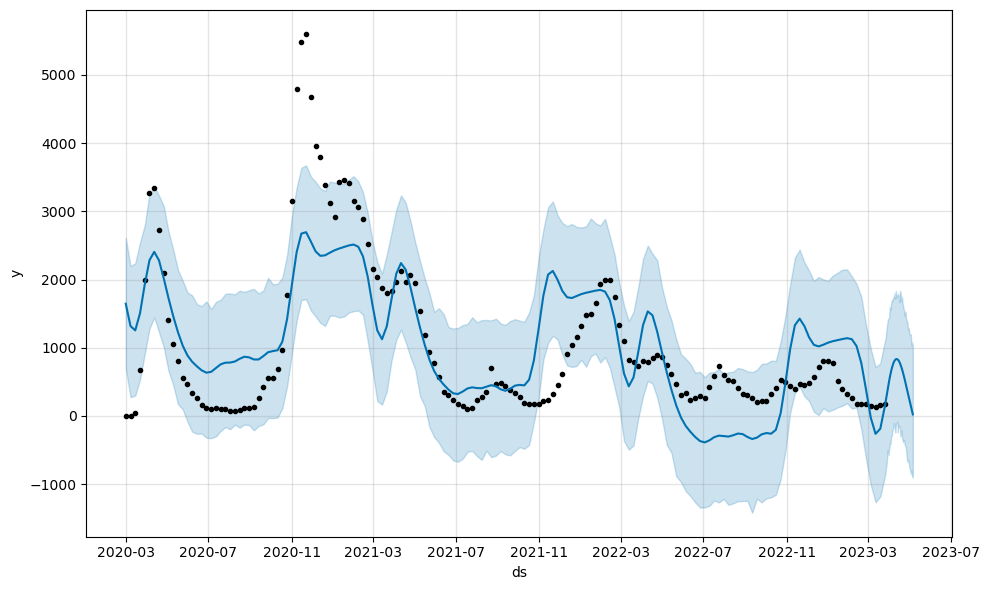

In [148]:
model_baseline = Prophet().fit(france_train.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}))
future_baseline = model_baseline.make_future_dataframe(periods=41)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 

performance_baseline = pd.merge(france_test.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}) , forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-41:], on='ds')
mase_calculator = MeanAbsoluteScaledError(sp=12)
y_true = performance_baseline['y'].values
y_pred = performance_baseline['yhat'].values

mase_score = mase_calculator(y_true=y_true, y_pred=y_pred, y_train = france_train['new_deaths'])

print(f'The MASE for the baseline model is {mase_score}')
metrics_df_3 = metrics_df_3.append({'Model': 'Prophet France', 'MASE': mase_score}, ignore_index=True)
metrics_df = metrics_df.append({'Model': 'Prophet France', 'MASE': mase_score}, ignore_index=True)

### Ireland Prophet

22:50:13 - cmdstanpy - INFO - Chain [1] start processing


22:50:13 - cmdstanpy - INFO - Chain [1] done processing


The MASE for the baseline model is 1.0070255674460613


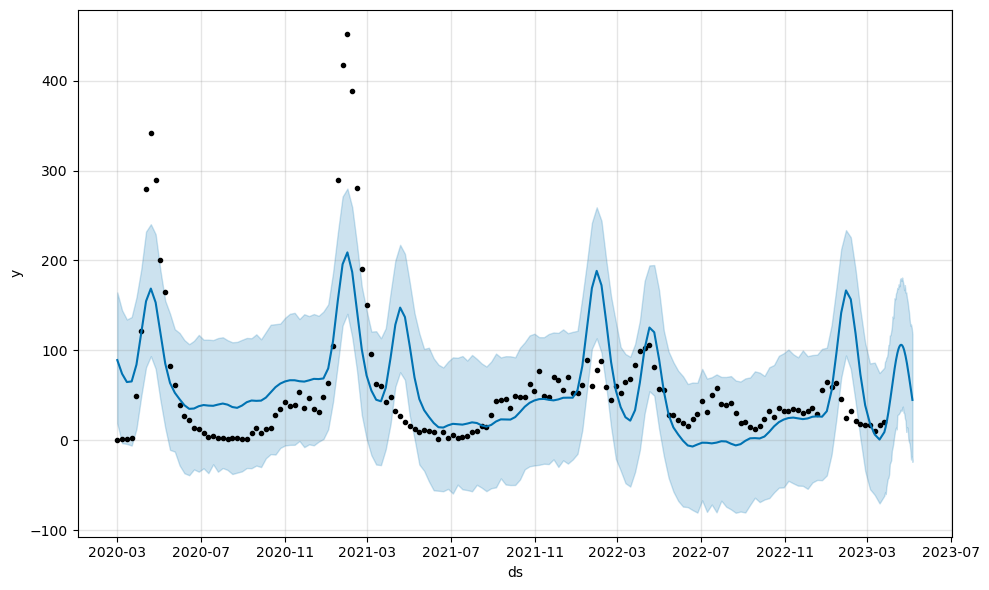

In [149]:
model_baseline = Prophet().fit(ireland_train.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}))
future_baseline = model_baseline.make_future_dataframe(periods=41)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 

performance_baseline = pd.merge(ireland_test.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}) , forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-41:], on='ds')
mase_calculator = MeanAbsoluteScaledError(sp=12)
y_true = performance_baseline['y'].values
y_pred = performance_baseline['yhat'].values

mase_score = mase_calculator(y_true=y_true, y_pred=y_pred, y_train = ireland_train['new_deaths'])

print(f'The MASE for the baseline model is {mase_score}')
metrics_df_3 = metrics_df_3.append({'Model': 'Prophet Ireland', 'MASE': mase_score}, ignore_index=True)
metrics_df = metrics_df.append({'Model': 'Prophet Ireland', 'MASE': mase_score}, ignore_index=True)

### Israel Prophet

22:50:23 - cmdstanpy - INFO - Chain [1] start processing
22:50:23 - cmdstanpy - INFO - Chain [1] done processing


The MASE for the baseline model is 0.5816617574005355


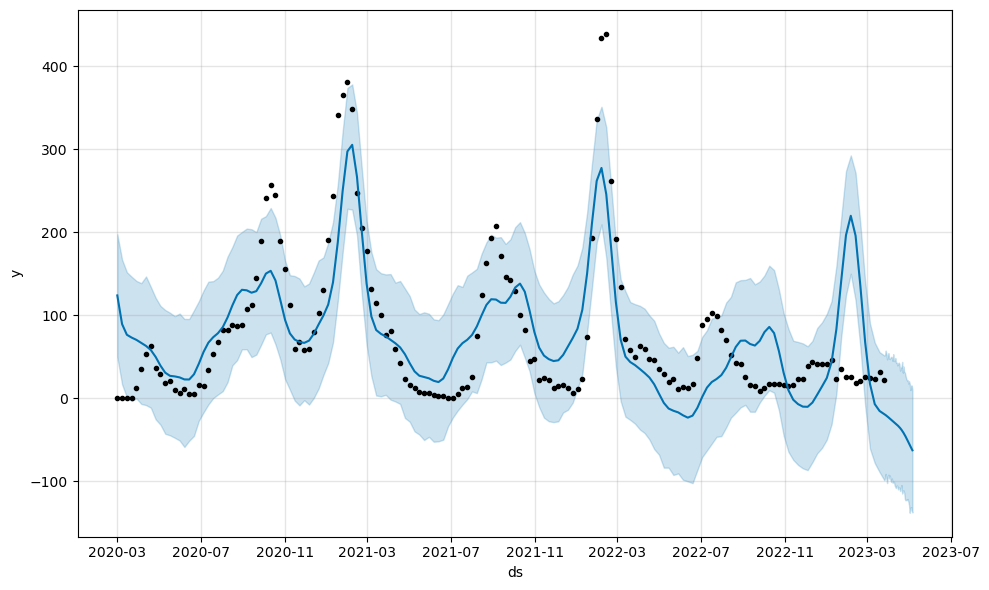

In [150]:
model_baseline = Prophet().fit(israel_train.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}))
future_baseline = model_baseline.make_future_dataframe(periods=41)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 

performance_baseline = pd.merge(israel_test.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}) , forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-41:], on='ds')
mase_calculator = MeanAbsoluteScaledError(sp=12)
y_true = performance_baseline['y'].values
y_pred = performance_baseline['yhat'].values

mase_score = mase_calculator(y_true=y_true, y_pred=y_pred, y_train = israel_train['new_deaths'])

print(f'The MASE for the baseline model is {mase_score}')
metrics_df_3 = metrics_df_3.append({'Model': 'Prophet Israel', 'MASE': mase_score}, ignore_index=True)
metrics_df = metrics_df.append({'Model': 'Prophet Israel', 'MASE': mase_score}, ignore_index=True)

### Italy Prophet

22:50:34 - cmdstanpy - INFO - Chain [1] start processing


22:50:34 - cmdstanpy - INFO - Chain [1] done processing


The MASE for the baseline model is 1.1057538196303072


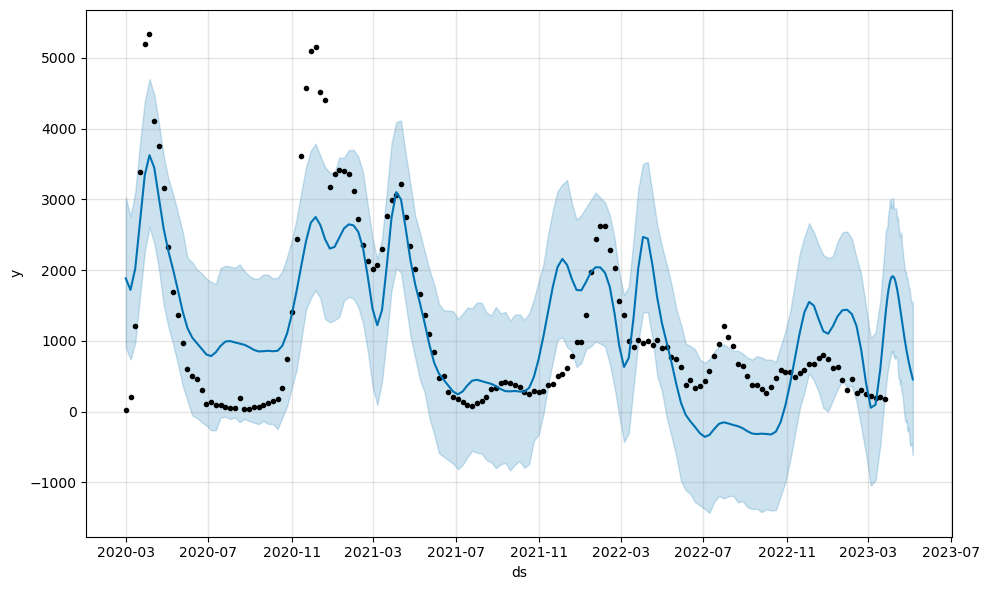

In [151]:
model_baseline = Prophet().fit(italy_train.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}))
future_baseline = model_baseline.make_future_dataframe(periods=41)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 

performance_baseline = pd.merge(italy_test.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}) , forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-41:], on='ds')
mase_calculator = MeanAbsoluteScaledError(sp=12)
y_true = performance_baseline['y'].values
y_pred = performance_baseline['yhat'].values

mase_score = mase_calculator(y_true=y_true, y_pred=y_pred, y_train = italy_train['new_deaths'])

print(f'The MASE for the baseline model is {mase_score}')
metrics_df_3 = metrics_df_3.append({'Model': 'Prophet Italy', 'MASE': mase_score}, ignore_index=True)
metrics_df = metrics_df.append({'Model': 'Prophet Italy', 'MASE': mase_score}, ignore_index=True)

### Malaysia Prophet

22:50:50 - cmdstanpy - INFO - Chain [1] start processing


22:50:50 - cmdstanpy - INFO - Chain [1] done processing


The MASE for the baseline model is 0.8697108277293679


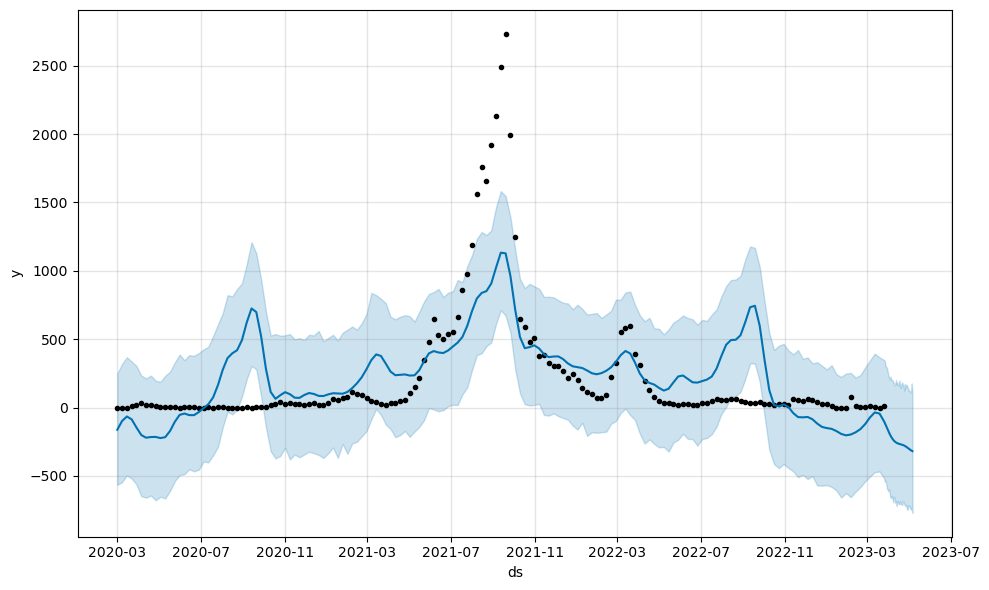

In [152]:
model_baseline = Prophet().fit(malaysia_train.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}))
future_baseline = model_baseline.make_future_dataframe(periods=41)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 

performance_baseline = pd.merge(malaysia_test.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}) , forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-41:], on='ds')

mase_calculator = MeanAbsoluteScaledError(sp=12)
y_true = performance_baseline['y'].values
y_pred = performance_baseline['yhat'].values

mase_score = mase_calculator(y_true=y_true, y_pred=y_pred, y_train = malaysia_train['new_deaths'])

print(f'The MASE for the baseline model is {mase_score}')
metrics_df_3 = metrics_df_3.append({'Model': 'Prophet Malaysia', 'MASE': mase_score}, ignore_index=True)
metrics_df = metrics_df.append({'Model': 'Prophet Malaysia', 'MASE': mase_score}, ignore_index=True)

### USA Prophet

22:51:03 - cmdstanpy - INFO - Chain [1] start processing


22:51:03 - cmdstanpy - INFO - Chain [1] done processing


The MASE for the baseline model is 0.48195757744073925


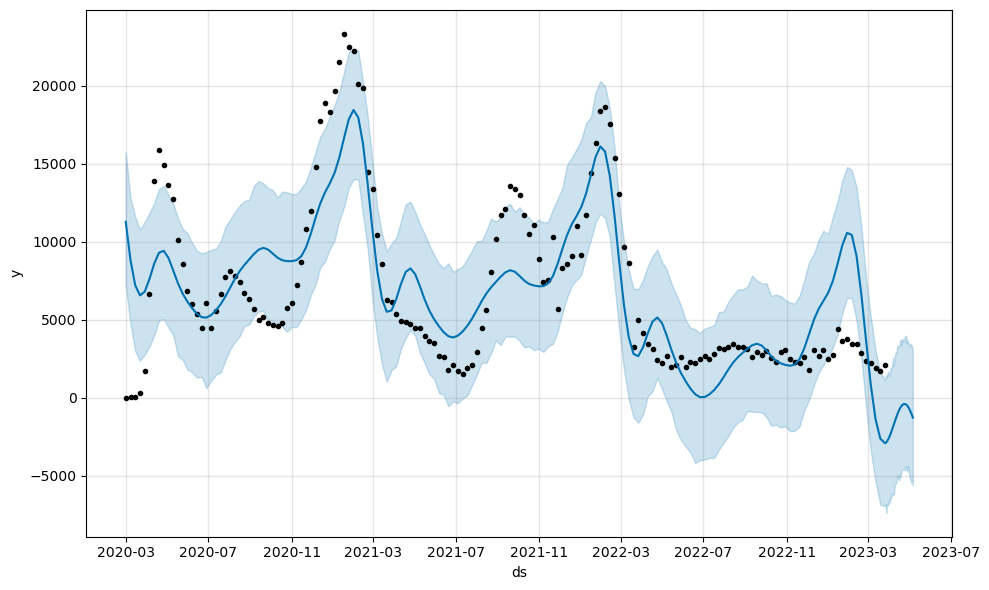

In [153]:
model_baseline = Prophet().fit(usa_train.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}))
future_baseline = model_baseline.make_future_dataframe(periods=41)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 

performance_baseline = pd.merge(usa_test.reset_index().rename(columns={'date':'ds', 'new_deaths':'y'}) , forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-41:], on='ds')
mase_calculator = MeanAbsoluteScaledError(sp=12)
y_true = performance_baseline['y'].values
y_pred = performance_baseline['yhat'].values

mase_score = mase_calculator(y_true=y_true, y_pred=y_pred, y_train = usa_train['new_deaths'])

print(f'The MASE for the baseline model is {mase_score}')
metrics_df_3 = metrics_df_3.append({'Model': 'Prophet USA', 'MASE': mase_score}, ignore_index=True)
metrics_df = metrics_df.append({'Model': 'Prophet USA', 'MASE': mase_score}, ignore_index=True)

In [155]:
metrics_df_3

,Model,MASE
0,Prophet Belgium,1.188031
1,Prophet Chile,0.998838
2,Prophet Czechia,1.214781
3,Prophet Czechia,0.668641
4,Prophet Estonia,0.546807
5,Prophet France,0.388915
6,Prophet Ireland,1.007026
7,Prophet Israel,0.581662
8,Prophet Italy,1.105754
9,Prophet Malaysia,0.869711


# Multivariate Models

## Prophet Multivariate

23:23:23 - cmdstanpy - INFO - Chain [1] start processing
23:23:33 - cmdstanpy - INFO - Chain [1] done processing


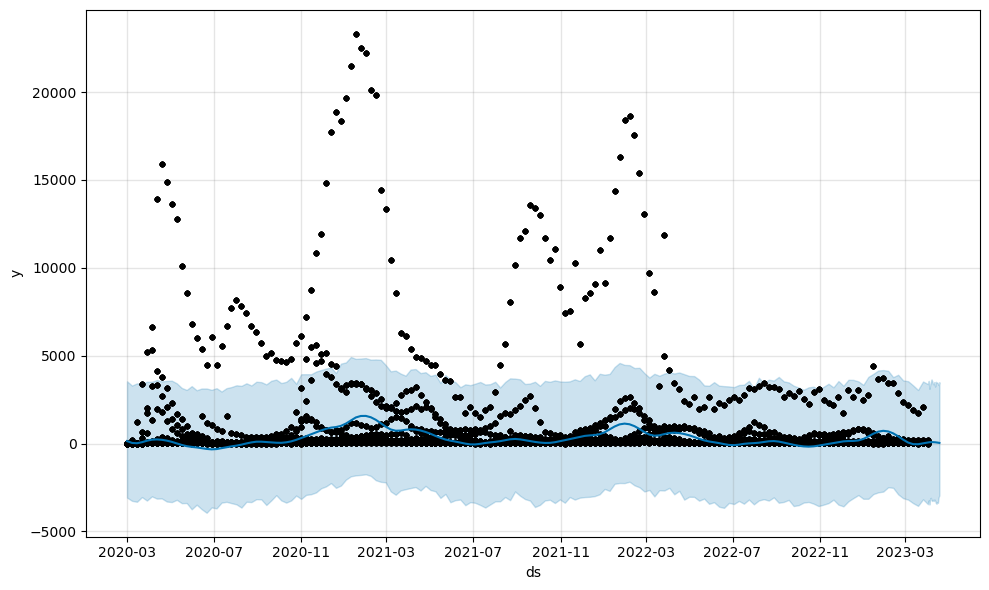

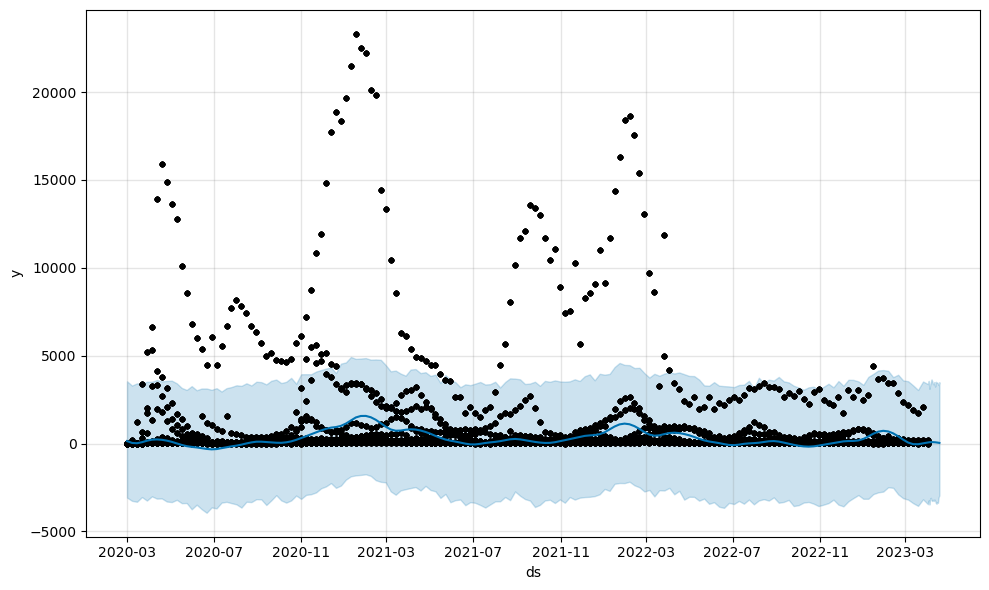

In [11]:
data = pd.read_csv('multi_variate_df.csv')
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')

def process(df):
    lag1df = df.shift(1)
    lag1df.columns = ['lag1_' + str(col) for col in lag1df.columns]
    df = df[['new_deaths']].join(lag1df)
    return df.fillna(0)

data = process(data)
data = pd.get_dummies(data)
train_size = int(len(data) * 0.8)
train = data.iloc[:train_size]
test = data.iloc[train_size:]

model = Prophet()
for col in train.columns:
    if col not in ['new_deaths', 'date']:
        model.add_regressor(col)

model = model.fit(train.reset_index().rename(columns={'date': 'ds', 'new_deaths': 'y'}))
future = model.make_future_dataframe(periods=16)

last_known_regressor_values = data.iloc[-1][[col for col in data.columns if 'lag1_' in col]].to_dict()
for regressor, value in last_known_regressor_values.items():
    future[regressor] = value

forecast = model.predict(future)
model.plot(forecast)


In [12]:
forecast_test = forecast[['ds', 'yhat']].merge(test.reset_index()[['date', 'new_deaths']], left_on='ds', right_on='date', how='inner')
actuals = forecast_test['new_deaths']
predictions = forecast_test['yhat']

mase = MeanAbsoluteScaledError(sp = 12)
mase = mase(actuals, predictions, y_train = train['new_deaths'])
metrics_df = metrics_df.append({'Model': 'Prophet Multivariate', 'MASE': mase}, ignore_index=True)


NameError: name 'metrics_df' is not defined

In [13]:
forecast_test = forecast[['ds', 'yhat']].merge(test.reset_index()[['date', 'new_deaths']], left_on='ds', right_on='date', how='inner')
actuals = forecast_test['new_deaths']
predictions = forecast_test['yhat']

mase = MeanAbsoluteScaledError(sp = 12)
mase = mase(actuals, predictions, y_train = train['new_deaths'])
mase

0.1345454582564736

In [88]:
metrics_df

,Model,MASE
0,ARIMA Belgium,0.811078
1,ARIMA Chile,0.819846
2,ARIMA Czechia,1.195245
3,ARIMA Estonia,0.325381
4,ARIMA France,0.692314
5,ARIMA Ireland,0.686831
6,ARIMA Italy,0.796399
7,ARIMA Israel,0.609589
8,ARIMA Malaysia,0.200664
9,ARIMA USA,0.192068


In [156]:
sorted_metrics_df = metrics_df_3.sort_values(by='MASE', ascending=True)
sorted_metrics_df['MASE'] = sorted_metrics_df['MASE'].astype(float)
sorted_metrics_df['MASE'] = sorted_metrics_df['MASE'].apply(lambda x: '{:.6f}'.format(x))
sorted_metrics_df

,Model,MASE
5,Prophet France,0.388915
10,Prophet USA,0.481958
4,Prophet Estonia,0.546807
7,Prophet Israel,0.581662
3,Prophet Czechia,0.668641
9,Prophet Malaysia,0.869711
1,Prophet Chile,0.998838
6,Prophet Ireland,1.007026
8,Prophet Italy,1.105754
0,Prophet Belgium,1.188031


## XGBoost 

In [89]:
df = pd.read_csv('multi_variate_df.csv')
df = df.drop(columns=['iso_code'])
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df.sort_index()

categorical = ['continent', 'tests_units', 'season', 'location']
df = pd.get_dummies(df, columns=categorical)

df_clean = df.dropna(subset=['new_deaths'])

train_size = int(len(df_clean) * 0.8)
train = df_clean.iloc[:train_size]
test = df_clean.iloc[train_size:]

X_train = train.drop(columns=['new_deaths'])
y_train = train['new_deaths']
X_test = test.drop(columns=['new_deaths'])
y_test = test['new_deaths']

reg = xgb.XGBRegressor(learning_rate=0.3, n_estimators=1000, early_stopping_rounds=10)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=True)


[0]	validation_0-rmse:2098.34445	validation_1-rmse:261.83585
[1]	validation_0-rmse:1516.30096	validation_1-rmse:183.21517
[2]	validation_0-rmse:1099.73961	validation_1-rmse:135.14479
[3]	validation_0-rmse:802.86463	validation_1-rmse:97.19505
[4]	validation_0-rmse:591.46593	validation_1-rmse:72.91708


[5]	validation_0-rmse:437.75324	validation_1-rmse:58.29386
[6]	validation_0-rmse:326.11066	validation_1-rmse:49.13294
[7]	validation_0-rmse:245.09911	validation_1-rmse:42.56676
[8]	validation_0-rmse:186.35254	validation_1-rmse:38.87225
[9]	validation_0-rmse:143.05207	validation_1-rmse:37.59537
[10]	validation_0-rmse:110.75799	validation_1-rmse:36.21317
[11]	validation_0-rmse:86.64118	validation_1-rmse:35.25558
[12]	validation_0-rmse:68.93834	validation_1-rmse:34.95686
[13]	validation_0-rmse:55.54289	validation_1-rmse:34.60455
[14]	validation_0-rmse:45.97394	validation_1-rmse:34.57557
[15]	validation_0-rmse:38.55743	validation_1-rmse:34.40637
[16]	validation_0-rmse:32.86013	validation_1-rmse:34.17161
[17]	validation_0-rmse:28.40555	validation_1-rmse:33.84982
[18]	validation_0-rmse:24.68443	validation_1-rmse:33.83634
[19]	validation_0-rmse:21.89356	validation_1-rmse:33.76715
[20]	validation_0-rmse:19.58392	validation_1-rmse:33.77537
[21]	validation_0-rmse:17.77725	validation_1-rmse:33.74

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [90]:
results = reg.evals_result()

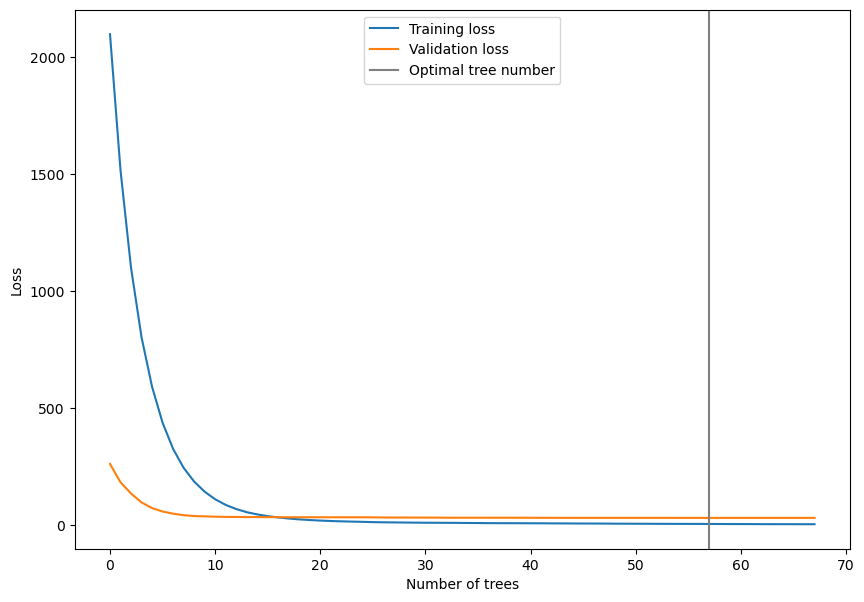

In [91]:
plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(reg.best_iteration, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

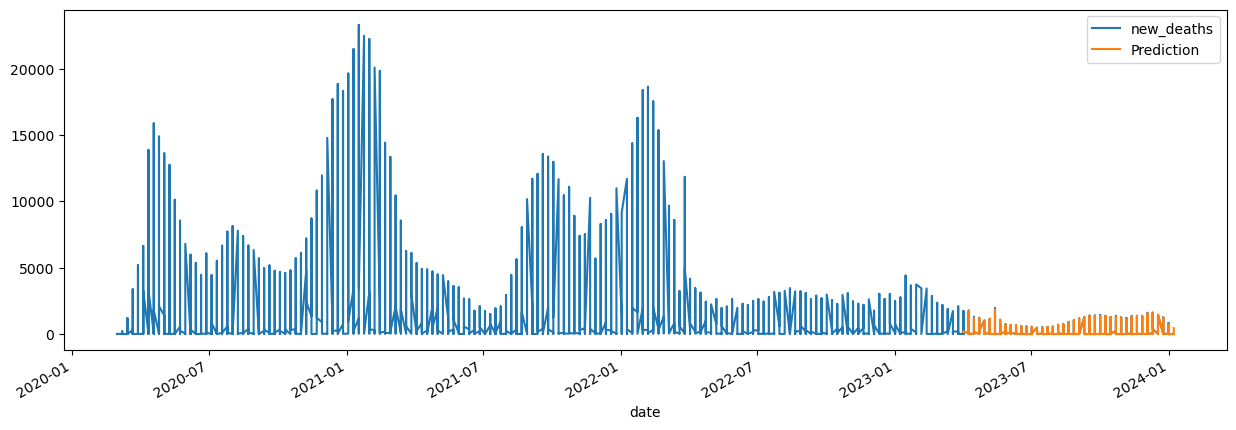

In [92]:
test['Prediction'] = reg.predict(X_test)
pjme_all = pd.concat([test, train], sort=False)
_ = pjme_all[['new_deaths','Prediction']].plot(figsize=(15, 5))

In [93]:
y_val = test[['new_deaths']].copy()
y_val.sort_index(inplace=True)
y_pred = test['Prediction'].squeeze() 
y_pred.sort_index(inplace=True)
y_train_df = train[['new_deaths']].copy()
y_train_df.sort_index(inplace=True)

In [94]:
mase = MeanAbsoluteScaledError(sp = 12)
mase = mase(y_val, y_pred, y_train = y_train_df)
mase

0.004579430472745732

In [95]:
mae = mean_absolute_error(y_val, y_pred)
mae

7.220273469196687

mae = 

In [96]:
metrics_df = metrics_df.append({'Model': 'XGBoost Multivariate', 'MASE': mase}, ignore_index=True)

# Metrics Results

In [97]:
metrics_df

,Model,MASE
0,ARIMA Belgium,0.811078
1,ARIMA Chile,0.819846
2,ARIMA Czechia,1.195245
3,ARIMA Estonia,0.325381
4,ARIMA France,0.692314
5,ARIMA Ireland,0.686831
6,ARIMA Italy,0.796399
7,ARIMA Israel,0.609589
8,ARIMA Malaysia,0.200664
9,ARIMA USA,0.192068


In [98]:
sorted_metrics_df = metrics_df.sort_values(by='MASE', ascending=True)
sorted_metrics_df['MASE'] = sorted_metrics_df['MASE'].astype(float)
sorted_metrics_df['MASE'] = sorted_metrics_df['MASE'].apply(lambda x: '{:.6f}'.format(x))
sorted_metrics_df


,Model,MASE
31,XGBoost Multivariate,0.004579
18,Auto ARIMA Malaysia,0.050639
12,Auto ARIMA Czechia,0.100879
14,Auto ARIMA France,0.122468
9,ARIMA USA,0.192068
30,Prophet Multivariate,0.192468
8,ARIMA Malaysia,0.200664
3,ARIMA Estonia,0.325381
10,Auto ARIMA Belgium,0.338012
17,Auto ARIMA Italy,0.585653
